In [14]:
# Resume Classifier Implementation - Steps 0 & 1
# File: resume_classifier.ipynb

import os
import json
import numpy as np
import pandas as pd
import random
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime

# Step 0 - Project Setup
print("=== Step 0: Project Setup ===")

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Create project structure
project_folders = ['data', 'models', 'notebooks', 'src', 'data/domain_requirements']
for folder in project_folders:
    Path(folder).mkdir(parents=True, exist_ok=True)
    print(f"Created folder: {folder}")

print("Project structure created successfully!")

=== Step 0: Project Setup ===
Created folder: data
Created folder: models
Created folder: notebooks
Created folder: src
Created folder: data/domain_requirements
Project structure created successfully!



=== Step 1: Balanced Dataset Generation ===
Saved: data/domain_requirements/data_science.json
Saved: data/domain_requirements/web_development.json
Saved: data/domain_requirements/mobile_development.json
Saved: data/domain_requirements/devops.json
Saved: data/domain_requirements/cybersecurity.json
Generating balanced synthetic resumes...
Target distribution:
  Fit: 660 (33.0%)
  Partial Fit: 680 (34.0%)
  Not Fit: 660 (33.0%)
Generated 2000 synthetic resumes
Saved to: data/balanced_synthetic_resumes.json

=== Sample Resume ===
{
  "test_score": 41,
  "preferred_domain": "Cybersecurity",
  "id": "candidate_0770",
  "skill_match_ratio": 0.42857142857142855,
  "test_score_norm": 0.41,
  "project_count": 3,
  "label": "Partial Fit"
}
Skills: ['Risk Assessment', 'Network Security', 'Penetration Testing', 'SIEM']

=== Balanced Dataset Statistics ===
Total resumes: 2000
Average test score: 62.28
Test score std: 27.12

Label distribution:
label
Partial Fit    859
Fit            673
Not Fit    

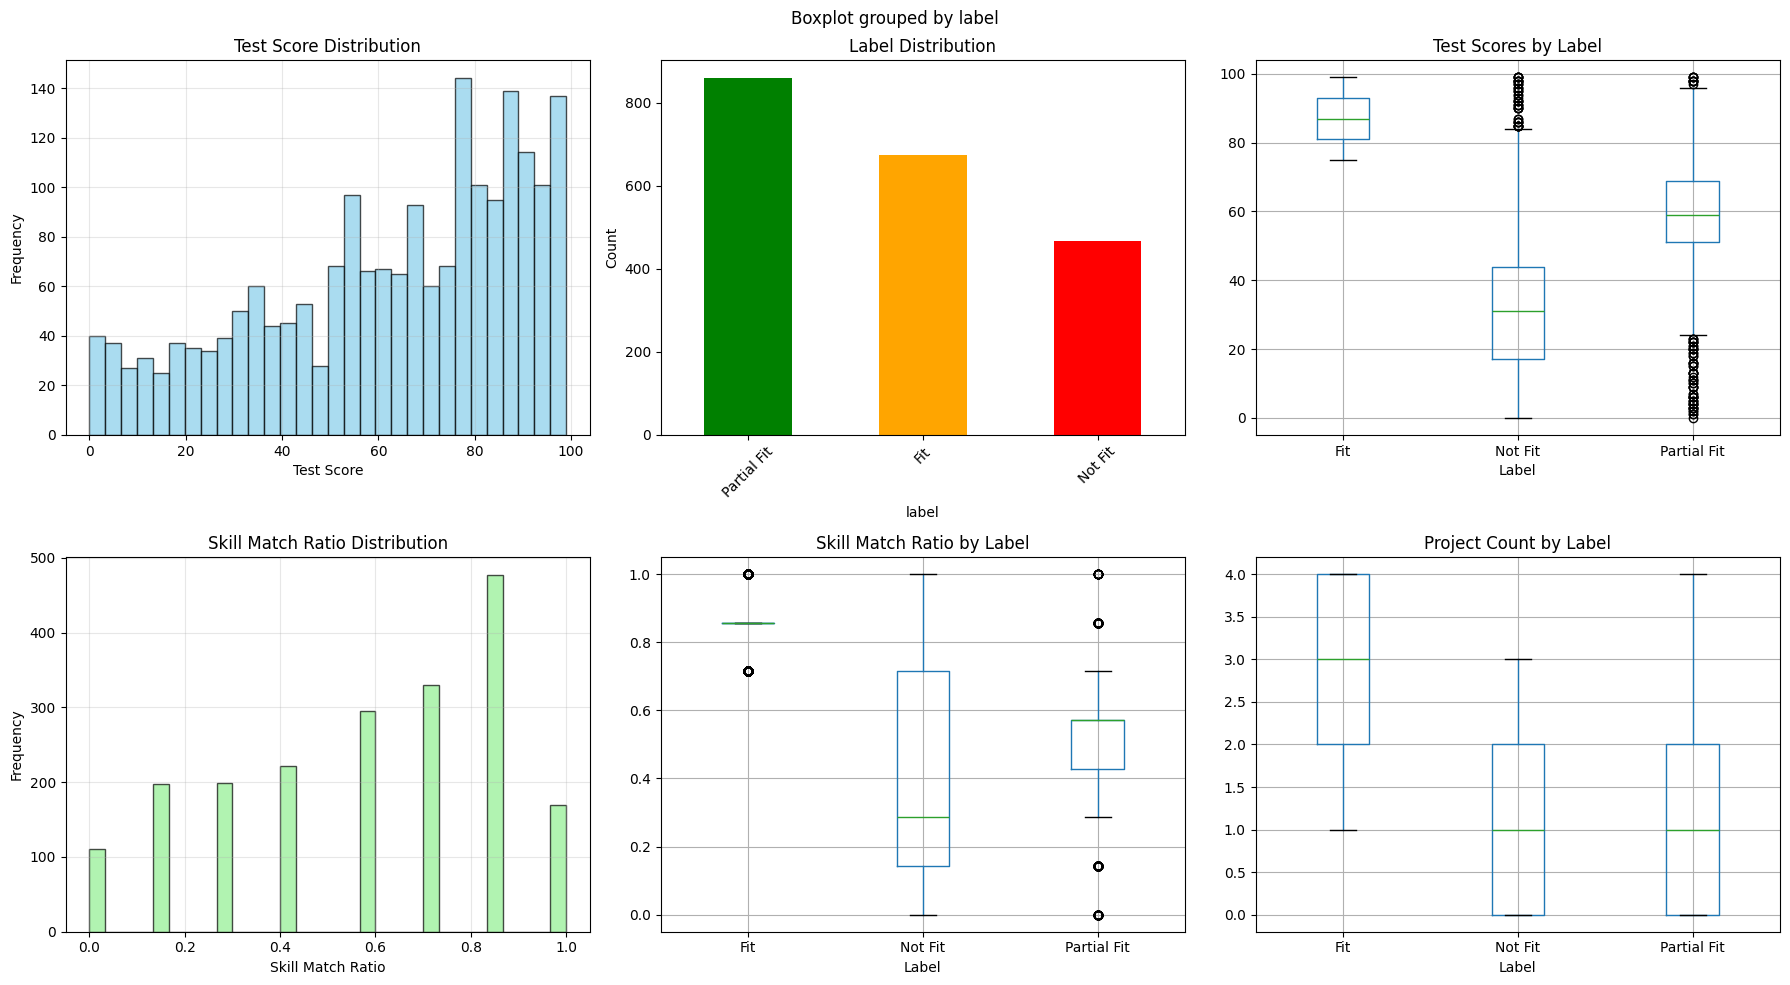


=== Label Verification ===
Checking if generated labels match the rules...
Label accuracy: 2000/2000 (100.0%)


In [15]:
# Step 1 - Generate/Collect Balanced Dataset
print("\n=== Step 1: Balanced Dataset Generation ===")

import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.2 Domain Requirements
domain_requirements = {
    "data_science": {
        "domain": "Data Science",
        "required_skills": ["Python", "Pandas", "NumPy", "Scikit-learn", "PyTorch", "Docker", "Deep Learning"]
    },
    "web_development": {
        "domain": "Web Development", 
        "required_skills": ["JavaScript", "React", "Node.js", "HTML", "CSS", "MongoDB", "Express"]
    },
    "mobile_development": {
        "domain": "Mobile Development",
        "required_skills": ["Java", "Kotlin", "Swift", "React Native", "Flutter", "iOS", "Android"]
    },
    "devops": {
        "domain": "DevOps",
        "required_skills": ["Docker", "Kubernetes", "AWS", "Jenkins", "Terraform", "Linux", "CI/CD"]
    },
    "cybersecurity": {
        "domain": "Cybersecurity",
        "required_skills": ["Network Security", "Penetration Testing", "CISSP", "Firewall", "Encryption", "Python", "Risk Assessment"]
    }
}

# Save domain requirements
import os
os.makedirs('data/domain_requirements', exist_ok=True)
for domain_key, requirements in domain_requirements.items():
    file_path = f"data/domain_requirements/{domain_key}.json"
    with open(file_path, 'w') as f:
        json.dump(requirements, f, indent=2)
    print(f"Saved: {file_path}")

def generate_balanced_resumes(n_samples=2000, target_distribution=None):
    """
    Generate synthetic resume data with balanced labels
    
    target_distribution: dict with 'fit', 'partial_fit', 'not_fit' ratios
    Default is roughly equal distribution
    """
    
    if target_distribution is None:
        target_distribution = {
            'fit': 0.33,
            'partial_fit': 0.34, 
            'not_fit': 0.33
        }
    
    # Calculate target counts
    n_fit = int(n_samples * target_distribution['fit'])
    n_partial = int(n_samples * target_distribution['partial_fit'])
    n_not_fit = n_samples - n_fit - n_partial
    
    print(f"Target distribution:")
    print(f"  Fit: {n_fit} ({n_fit/n_samples:.1%})")
    print(f"  Partial Fit: {n_partial} ({n_partial/n_samples:.1%})")
    print(f"  Not Fit: {n_not_fit} ({n_not_fit/n_samples:.1%})")
    
    # Skill pools for different domains
    all_skills = {
        "data_science": ["Python", "R", "SQL", "Pandas", "NumPy", "Scikit-learn", "TensorFlow", "PyTorch", 
                        "Matplotlib", "Seaborn", "Jupyter", "Docker", "Deep Learning", "Machine Learning", 
                        "Statistics", "Data Visualization", "Big Data", "Spark", "Hadoop"],
        "web_dev": ["JavaScript", "React", "Vue.js", "Angular", "Node.js", "Express", "HTML", "CSS", 
                   "MongoDB", "PostgreSQL", "MySQL", "Redis", "GraphQL", "REST API", "TypeScript", 
                   "Webpack", "Git", "Bootstrap", "Sass"],
        "mobile": ["Java", "Kotlin", "Swift", "React Native", "Flutter", "Dart", "iOS", "Android", 
                  "Xcode", "Android Studio", "Firebase", "SQLite", "Core Data", "UIKit", "SwiftUI"],
        "devops": ["Docker", "Kubernetes", "AWS", "Azure", "GCP", "Jenkins", "Terraform", "Ansible", 
                  "Linux", "Bash", "Python", "CI/CD", "Git", "Monitoring", "Nagios", "Prometheus"],
        "security": ["Network Security", "Penetration Testing", "CISSP", "CEH", "Firewall", "Encryption", 
                    "Python", "Wireshark", "Metasploit", "Nmap", "Risk Assessment", "Compliance", "SIEM"]
    }
    
    # Project templates
    project_templates = {
        "data_science": ["Customer Churn Prediction", "Sales Forecasting Model", "Recommendation System", 
                        "Fraud Detection Algorithm", "Image Classification", "Natural Language Processing"],
        "web_dev": ["E-commerce Website", "Social Media Platform", "Portfolio Website", "Blog Platform", 
                   "Task Management App", "Real-time Chat Application"],
        "mobile": ["Weather App", "Fitness Tracker", "Food Delivery App", "Social Media App", 
                  "Game Application", "Banking App"],
        "devops": ["CI/CD Pipeline Setup", "Infrastructure as Code", "Container Orchestration", 
                  "Monitoring Dashboard", "Automated Deployment", "Cloud Migration"],
        "security": ["Vulnerability Assessment", "Security Audit", "Network Monitoring System", 
                    "Incident Response Plan", "Security Training Program", "Compliance Framework"]
    }
    
    # Job titles
    job_titles = {
        "data_science": ["Data Scientist", "ML Engineer", "Data Analyst", "Research Scientist"],
        "web_dev": ["Frontend Developer", "Backend Developer", "Full Stack Developer", "Web Developer"],
        "mobile": ["iOS Developer", "Android Developer", "Mobile Developer", "App Developer"],
        "devops": ["DevOps Engineer", "Site Reliability Engineer", "Cloud Engineer", "Infrastructure Engineer"],
        "security": ["Security Analyst", "Cybersecurity Engineer", "Security Consultant", "SOC Analyst"]
    }
    
    skill_key_mapping = {
        "data_science": "data_science",
        "web_development": "web_dev", 
        "mobile_development": "mobile",
        "devops": "devops",
        "cybersecurity": "security"
    }
    
    domains = list(domain_requirements.keys())
    resumes = []
    
    def generate_resume_for_category(category, candidate_id):
        """Generate a resume targeting a specific fit category"""
        
        # Choose preferred domain
        preferred_domain_key = random.choice(domains)
        preferred_domain = domain_requirements[preferred_domain_key]["domain"]
        required_skills = domain_requirements[preferred_domain_key]["required_skills"]
        
        domain_skills = all_skills[skill_key_mapping.get(preferred_domain_key, "data_science")]
        other_skills = []
        for skill_set in all_skills.values():
            other_skills.extend(skill_set)
        other_skills = list(set(other_skills) - set(domain_skills))
        
        # Generate skills based on target category
        if category == 'fit':
            # High skill match (>=70%) and high test score (>=75)
            required_count = max(1, int(len(required_skills) * random.uniform(0.7, 1.0)))
            selected_required = random.sample(required_skills, required_count)
            
            # Add more domain skills
            additional_domain = random.sample(
                [s for s in domain_skills if s not in selected_required], 
                random.randint(2, 5)
            )
            selected_skills = selected_required + additional_domain
            
            # High test score (75-100)
            test_score = int(random.uniform(75, 100))
            
            # At least 1 project
            n_projects = random.randint(1, 4)
            
        elif category == 'partial_fit':
            # Medium skill match (40-70%) OR medium test score (50-75%)
            if random.choice([True, False]):
                # Medium skill match with varying test score
                required_count = max(1, int(len(required_skills) * random.uniform(0.4, 0.69)))
                selected_required = random.sample(required_skills, required_count)
                additional_domain = random.sample(
                    [s for s in domain_skills if s not in selected_required], 
                    random.randint(1, 3)
                )
                selected_skills = selected_required + additional_domain
                test_score = int(random.uniform(30, 100))  # Any test score
            else:
                # Any skill match with medium test score
                required_count = max(0, int(len(required_skills) * random.uniform(0.0, 1.0)))
                if required_count > 0:
                    selected_required = random.sample(required_skills, required_count)
                else:
                    selected_required = []
                additional_domain = random.sample(
                    [s for s in domain_skills if s not in selected_required], 
                    random.randint(1, 4)
                )
                selected_skills = selected_required + additional_domain
                test_score = int(random.uniform(50, 74))  # Medium test score
            
            n_projects = random.randint(0, 3)
            
        else:  # not_fit
            # Low skill match (<40%) OR low test score (<50)
            if random.choice([True, False]):
                # Low skill match with any test score
                required_count = max(0, int(len(required_skills) * random.uniform(0.0, 0.39)))
                if required_count > 0:
                    selected_required = random.sample(required_skills, required_count)
                else:
                    selected_required = []
                
                # Add mostly other skills or few domain skills
                if random.choice([True, False]):
                    # Mostly other skills
                    selected_skills = selected_required + random.sample(other_skills, random.randint(2, 6))
                else:
                    # Few domain skills
                    additional_domain = random.sample(
                        [s for s in domain_skills if s not in selected_required], 
                        random.randint(0, 2)
                    )
                    selected_skills = selected_required + additional_domain
                
                test_score = int(random.uniform(0, 100))  # Any test score
            else:
                # Any skill match with low test score
                required_count = max(0, int(len(required_skills) * random.uniform(0.0, 1.0)))
                if required_count > 0:
                    selected_required = random.sample(required_skills, required_count)
                else:
                    selected_required = []
                additional_domain = random.sample(
                    [s for s in domain_skills if s not in selected_required], 
                    random.randint(1, 4)
                )
                selected_skills = selected_required + additional_domain
                test_score = int(random.uniform(0, 49))  # Low test score
            
            n_projects = random.randint(0, 2)
        
        # Add some other skills randomly
        if len(selected_skills) < 8:
            additional_other = random.sample(other_skills, random.randint(0, 3))
            selected_skills.extend(additional_other)
        
        # Generate projects
        domain_projects = project_templates[skill_key_mapping.get(preferred_domain_key, "data_science")]
        selected_projects = random.sample(domain_projects, min(n_projects, len(domain_projects)))
        
        # Generate work experience
        n_jobs = random.randint(1, 4)
        work_experience = []
        domain_job_titles = job_titles[skill_key_mapping.get(preferred_domain_key, "data_science")]

        for _ in range(n_jobs):
            title = random.choice(domain_job_titles)
            years = random.randint(1, 8)
            work_experience.append({"title": title, "years": years})
        
        # Create resume
        resume = {
            "skills": list(set(selected_skills)),  # Remove duplicates
            "projects": selected_projects,
            "work_experience": work_experience,
            "test_score": test_score,
            "preferred_domain": preferred_domain,
            "id": f"candidate_{candidate_id:04d}"
        }
        
        return resume
    
    # Generate resumes for each category
    candidate_id = 1
    
    # Generate Fit candidates
    for _ in range(n_fit):
        resume = generate_resume_for_category('fit', candidate_id)
        resumes.append(resume)
        candidate_id += 1
    
    # Generate Partial Fit candidates
    for _ in range(n_partial):
        resume = generate_resume_for_category('partial_fit', candidate_id)
        resumes.append(resume)
        candidate_id += 1
    
    # Generate Not Fit candidates
    for _ in range(n_not_fit):
        resume = generate_resume_for_category('not_fit', candidate_id)
        resumes.append(resume)
        candidate_id += 1
    
    # Shuffle the resumes
    random.shuffle(resumes)
    
    return resumes

def calculate_labels(resumes):
    """Calculate labels for resumes based on the given rules"""
    labeled_resumes = []
    
    for resume in resumes:
        preferred_domain_key = None
        for key, domain_info in domain_requirements.items():
            if domain_info["domain"] == resume["preferred_domain"]:
                preferred_domain_key = key
                break
        
        if preferred_domain_key is None:
            continue
            
        required_skills = set(domain_requirements[preferred_domain_key]["required_skills"])
        candidate_skills = set(resume["skills"])
        
        # Calculate skill match ratio
        skill_matches = len(required_skills.intersection(candidate_skills))
        skill_match_ratio = skill_matches / len(required_skills)
        
        # Normalize test score
        test_score_norm = resume["test_score"] / 100.0
        
        # Count projects
        project_count = len(resume["projects"])
        
        # Apply rules
        if skill_match_ratio >= 0.70 and test_score_norm >= 0.75 and project_count >= 1:
            label = "Fit"
        elif (0.40 <= skill_match_ratio < 0.70) or (0.50 <= test_score_norm < 0.75):
            label = "Partial Fit"
        else:
            label = "Not Fit"
        
        # Add calculated metrics to resume
        resume_with_label = resume.copy()
        resume_with_label.update({
            "skill_match_ratio": skill_match_ratio,
            "test_score_norm": test_score_norm,
            "project_count": project_count,
            "label": label
        })
        
        labeled_resumes.append(resume_with_label)
    
    return labeled_resumes

# Generate balanced dataset
print("Generating balanced synthetic resumes...")
synthetic_resumes = generate_balanced_resumes(2000)

# Calculate labels and add metrics
labeled_resumes = calculate_labels(synthetic_resumes)

# Save to JSON file
os.makedirs('data', exist_ok=True)
with open('data/balanced_synthetic_resumes.json', 'w') as f:
    json.dump(labeled_resumes, f, indent=2)

print(f"Generated {len(labeled_resumes)} synthetic resumes")
print("Saved to: data/balanced_synthetic_resumes.json")

# Display sample resume
print("\n=== Sample Resume ===")
sample_resume = random.choice(labeled_resumes)
print(json.dumps({k: v for k, v in sample_resume.items() if k not in ['skills', 'projects', 'work_experience']}, indent=2))
print(f"Skills: {sample_resume['skills'][:5]}..." if len(sample_resume['skills']) > 5 else f"Skills: {sample_resume['skills']}")

# Generate comprehensive statistics
print("\n=== Balanced Dataset Statistics ===")
df = pd.DataFrame(labeled_resumes)

print(f"Total resumes: {len(df)}")
print(f"Average test score: {df['test_score'].mean():.2f}")
print(f"Test score std: {df['test_score'].std():.2f}")

print("\nLabel distribution:")
label_counts = df['label'].value_counts()
print(label_counts)
for label in label_counts.index:
    print(f"{label}: {label_counts[label]/len(df):.1%}")

print("\nDomain distribution:")
print(df['preferred_domain'].value_counts())

print("\nTest score distribution by label:")
for label in df['label'].unique():
    label_scores = df[df['label'] == label]['test_score']
    print(f"{label}: {label_scores.mean():.1f} ± {label_scores.std():.1f}")

print("\nSkill match ratio by label:")
for label in df['label'].unique():
    label_ratios = df[df['label'] == label]['skill_match_ratio']
    print(f"{label}: {label_ratios.mean():.3f} ± {label_ratios.std():.3f}")

# Plot comprehensive statistics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Test score distribution
axes[0, 0].hist(df['test_score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Test Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Test Score Distribution')
axes[0, 0].grid(True, alpha=0.3)

# Label distribution
label_counts.plot(kind='bar', ax=axes[0, 1], color=['green', 'orange', 'red'])
axes[0, 1].set_title('Label Distribution')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Test scores by label
df.boxplot(column='test_score', by='label', ax=axes[0, 2])
axes[0, 2].set_title('Test Scores by Label')
axes[0, 2].set_xlabel('Label')

# Skill match ratio distribution
axes[1, 0].hist(df['skill_match_ratio'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Skill Match Ratio')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Skill Match Ratio Distribution')
axes[1, 0].grid(True, alpha=0.3)

# Skill match ratio by label
df.boxplot(column='skill_match_ratio', by='label', ax=axes[1, 1])
axes[1, 1].set_title('Skill Match Ratio by Label')
axes[1, 1].set_xlabel('Label')

# Project count by label
df.boxplot(column='project_count', by='label', ax=axes[1, 2])
axes[1, 2].set_title('Project Count by Label')
axes[1, 2].set_xlabel('Label')

plt.tight_layout()
plt.savefig('data/balanced_dataset_statistics.png', dpi=150, bbox_inches='tight')
plt.show()

# Verify label accuracy
print("\n=== Label Verification ===")
print("Checking if generated labels match the rules...")

correct_labels = 0
for resume in labeled_resumes:
    skill_match_ratio = resume['skill_match_ratio']
    test_score_norm = resume['test_score_norm']
    project_count = resume['project_count']
    
    # Apply rules
    if skill_match_ratio >= 0.70 and test_score_norm >= 0.75 and project_count >= 1:
        expected_label = "Fit"
    elif (0.40 <= skill_match_ratio < 0.70) or (0.50 <= test_score_norm < 0.75):
        expected_label = "Partial Fit"
    else:
        expected_label = "Not Fit"
    
    if resume['label'] == expected_label:
        correct_labels += 1

print(f"Label accuracy: {correct_labels}/{len(labeled_resumes)} ({correct_labels/len(labeled_resumes):.1%})")


=== Step 2: Ground Truth Labels ===
Applying rule-based labeling...
Created labels for 2000 resumes
Saved to: data/labeled_resumes.json

=== Label Distribution ===
Fit: 673 (33.7%)
Partial Fit: 866 (43.3%)
Not Fit: 461 (23.1%)

=== Sample Labeled Resumes ===

Fit Example:
  ID: candidate_0403
  Domain: Web Development
  Skills: 10 total
  Skill match ratio: 1.0 (7/7)
  Test score: 84 (norm: 0.84)
  Projects: 2

Partial Fit Example:
  ID: candidate_1246
  Domain: Data Science
  Skills: 7 total
  Skill match ratio: 0.571 (4/7)
  Test score: 37 (norm: 0.37)
  Projects: 1

Not Fit Example:
  ID: candidate_1490
  Domain: Web Development
  Skills: 9 total
  Skill match ratio: 0.714 (5/7)
  Test score: 3 (norm: 0.03)
  Projects: 0

=== Label Distribution by Domain ===
label               Fit  Not Fit  Partial Fit
preferred_domain                             
Cybersecurity       128       97          165
Data Science        136      100          169
DevOps              123       91          1

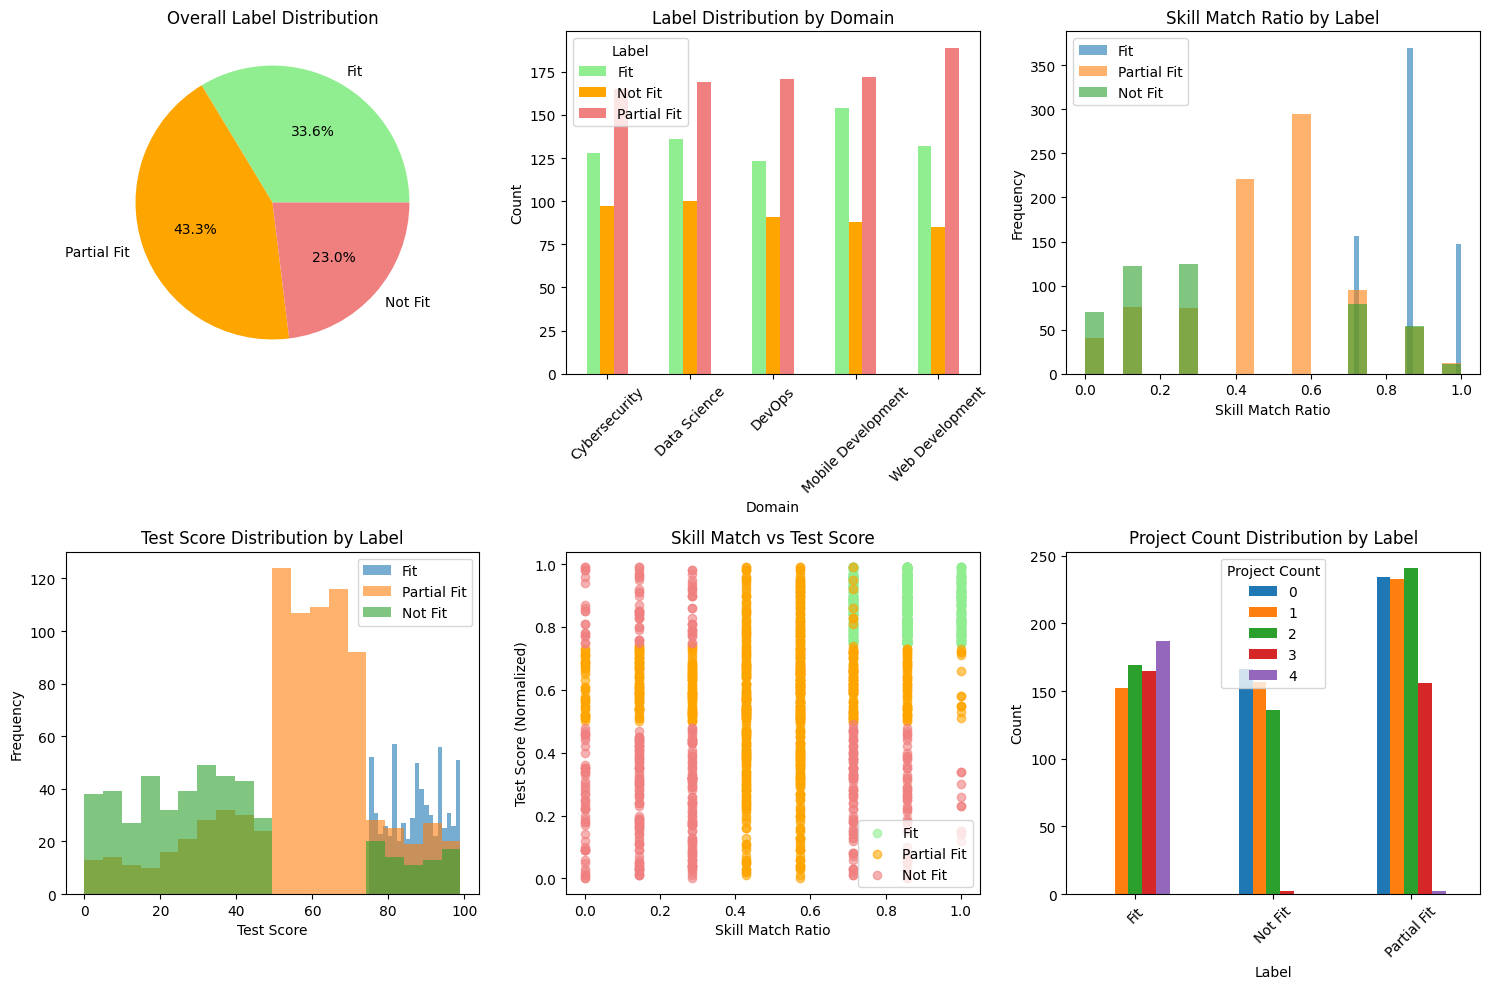


=== Rule Validation Statistics ===
Average skill match ratio by label:
              mean    std
label                    
Fit          0.855  0.096
Not Fit      0.362  0.307
Partial Fit  0.486  0.214

Average test score by label:
             mean   std
label                  
Fit          87.2   7.2
Not Fit      34.9  26.2
Partial Fit  57.5  19.8

Average project count by label:
             mean   std
label                  
Fit          2.58  1.12
Not Fit      0.94  0.82
Partial Fit  1.38  1.07


In [16]:
# Step 2 - Create Ground Truth Labels (Rule-based)
print("\n=== Step 2: Ground Truth Labels ===")

def create_ground_truth_labels(resumes, domain_requirements):
    """
    Create ground truth labels using rule-based approach
    
    Rules:
    - Fit: skill_match_ratio >= 0.70 AND test_score_norm >= 0.75 AND project_count >= 1
    - Partial Fit: (0.40 <= skill_match_ratio < 0.70) OR (0.50 <= test_score_norm < 0.75)
    - Not Fit: skill_match_ratio < 0.40 OR test_score_norm < 0.50
    """
    
    labeled_resumes = []
    label_stats = {"Fit": 0, "Partial Fit": 0, "Not Fit": 0}
    
    for resume in resumes:
        # Get domain requirements for this candidate's preferred domain
        domain_key = None
        for key, req in domain_requirements.items():
            if req["domain"] == resume["preferred_domain"]:
                domain_key = key
                break
        
        if domain_key is None:
            print(f"Warning: No requirements found for domain {resume['preferred_domain']}")
            continue
            
        required_skills = set(domain_requirements[domain_key]["required_skills"])
        candidate_skills = set(resume["skills"])
        
        # Calculate skill match ratio
        matched_skills = len(required_skills.intersection(candidate_skills))
        total_required_skills = len(required_skills)
        skill_match_ratio = matched_skills / total_required_skills if total_required_skills > 0 else 0
        
        # Calculate normalized test score
        test_score_norm = resume["test_score"] / 100.0
        
        # Count projects
        project_count = len(resume["projects"])
        
        # Apply labeling rules
        if (skill_match_ratio >= 0.70) and (test_score_norm >= 0.75) and (project_count >= 1):
            label = "Fit"
        elif (0.40 <= skill_match_ratio < 0.70) or (0.50 <= test_score_norm < 0.75):
            label = "Partial Fit"
        elif (skill_match_ratio < 0.40) or (test_score_norm < 0.50):
            label = "Not Fit"
        else:
            label = "Partial Fit"  # Default case
        
        # Add computed metrics and label to resume
        labeled_resume = resume.copy()
        labeled_resume.update({
            "label": label,
            "skill_match_ratio": round(skill_match_ratio, 3),
            "test_score_norm": round(test_score_norm, 3),
            "project_count": project_count,
            "matched_skills": matched_skills,
            "total_required_skills": total_required_skills
        })
        
        labeled_resumes.append(labeled_resume)
        label_stats[label] += 1
    
    return labeled_resumes, label_stats

# Apply labeling to synthetic resumes
print("Applying rule-based labeling...")
labeled_resumes, label_statistics = create_ground_truth_labels(synthetic_resumes, domain_requirements)

# Save labeled dataset
with open('data/labeled_resumes.json', 'w') as f:
    json.dump(labeled_resumes, f, indent=2)

print(f"Created labels for {len(labeled_resumes)} resumes")
print("Saved to: data/labeled_resumes.json")

# Display labeling statistics
print("\n=== Label Distribution ===")
total_resumes = sum(label_statistics.values())
for label, count in label_statistics.items():
    percentage = (count / total_resumes) * 100
    print(f"{label}: {count} ({percentage:.1f}%)")

# Show sample labeled resumes
print("\n=== Sample Labeled Resumes ===")
for label in ["Fit", "Partial Fit", "Not Fit"]:
    sample = next((r for r in labeled_resumes if r["label"] == label), None)
    if sample:
        print(f"\n{label} Example:")
        print(f"  ID: {sample['id']}")
        print(f"  Domain: {sample['preferred_domain']}")
        print(f"  Skills: {len(sample['skills'])} total")
        print(f"  Skill match ratio: {sample['skill_match_ratio']} ({sample['matched_skills']}/{sample['total_required_skills']})")
        print(f"  Test score: {sample['test_score']} (norm: {sample['test_score_norm']})")
        print(f"  Projects: {sample['project_count']}")

# Detailed analysis by domain
print("\n=== Label Distribution by Domain ===")
df_labeled = pd.DataFrame(labeled_resumes)

domain_label_crosstab = pd.crosstab(df_labeled['preferred_domain'], df_labeled['label'])
print(domain_label_crosstab)

# Calculate percentages within each domain
domain_label_pct = pd.crosstab(df_labeled['preferred_domain'], df_labeled['label'], normalize='index') * 100
print("\nPercentages within each domain:")
print(domain_label_pct.round(1))

# Visualize label distributions
plt.figure(figsize=(15, 10))

# Overall label distribution
plt.subplot(2, 3, 1)
labels = list(label_statistics.keys())
counts = list(label_statistics.values())
colors = ['lightgreen', 'orange', 'lightcoral']
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Overall Label Distribution')

# Label distribution by domain
plt.subplot(2, 3, 2)
domain_label_crosstab.plot(kind='bar', ax=plt.gca(), color=colors)
plt.title('Label Distribution by Domain')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')

# Skill match ratio distribution by label
plt.subplot(2, 3, 3)
for label in labels:
    data = df_labeled[df_labeled['label'] == label]['skill_match_ratio']
    plt.hist(data, alpha=0.6, label=label, bins=20)
plt.xlabel('Skill Match Ratio')
plt.ylabel('Frequency')
plt.title('Skill Match Ratio by Label')
plt.legend()

# Test score distribution by label
plt.subplot(2, 3, 4)
for label in labels:
    data = df_labeled[df_labeled['label'] == label]['test_score']
    plt.hist(data, alpha=0.6, label=label, bins=20)
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.title('Test Score Distribution by Label')
plt.legend()

# Scatter plot: skill match ratio vs test score
plt.subplot(2, 3, 5)
for i, label in enumerate(labels):
    data = df_labeled[df_labeled['label'] == label]
    plt.scatter(data['skill_match_ratio'], data['test_score_norm'], 
               alpha=0.6, label=label, color=colors[i])
plt.xlabel('Skill Match Ratio')
plt.ylabel('Test Score (Normalized)')
plt.title('Skill Match vs Test Score')
plt.legend()

# Project count by label
plt.subplot(2, 3, 6)
project_counts = df_labeled.groupby(['label', 'project_count']).size().unstack(fill_value=0)
project_counts.plot(kind='bar', ax=plt.gca())
plt.title('Project Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Project Count')

plt.tight_layout()
plt.savefig('data/labeling_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Rule validation statistics
print("\n=== Rule Validation Statistics ===")
print(f"Average skill match ratio by label:")
skill_avg = df_labeled.groupby('label')['skill_match_ratio'].agg(['mean', 'std'])
print(skill_avg.round(3))

print(f"\nAverage test score by label:")
score_avg = df_labeled.groupby('label')['test_score'].agg(['mean', 'std'])
print(score_avg.round(1))

print(f"\nAverage project count by label:")
project_avg = df_labeled.groupby('label')['project_count'].agg(['mean', 'std'])
print(project_avg.round(2))


In [17]:
# Step 3 - Preprocessing & Helper Functions
print("\n=== Step 3: Preprocessing & Helper Functions ===")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# 3.1 Build skill vocabulary
def build_skill_vocabulary(resumes, domain_requirements):
    """
    Build comprehensive skill vocabulary from all resumes and domain requirements
    Returns sorted list of unique skills
    """
    all_skills = set()
    
    # Add skills from all resumes
    for resume in resumes:
        all_skills.update(resume.get('skills', []))
    
    # Add required skills from all domains
    for domain_data in domain_requirements.values():
        all_skills.update(domain_data.get('required_skills', []))
    
    # Clean and normalize skills
    cleaned_skills = set()
    for skill in all_skills:
        # Basic text normalization
        cleaned_skill = skill.strip().lower()
        if cleaned_skill and len(cleaned_skill) > 1:  # Remove empty or single char
            cleaned_skills.add(cleaned_skill)
    
    skill_vocab = sorted(list(cleaned_skills))
    return skill_vocab

# 3.2 Skill encoding function
def encode_skills(candidate_skills, skill_vocab):
    """
    Convert candidate skills list to binary vector
    Input: candidate skills list
    Output: binary vector of length skill_vocab_size where position i is 1 if skill present
    """
    skill_vector = np.zeros(len(skill_vocab), dtype=int)
    
    # Normalize candidate skills
    normalized_candidate_skills = {skill.strip().lower() for skill in candidate_skills}
    
    for i, vocab_skill in enumerate(skill_vocab):
        if vocab_skill in normalized_candidate_skills:
            skill_vector[i] = 1
            
    return skill_vector

# 3.3 Matched & missing skills (per domain)
def compute_skill_matches(candidate_skills, required_skills):
    """
    Compute matched and missing skills for a specific domain
    Returns: matched_skills (list), missing_skills (list), skill_match_ratio (float)
    """
    # Normalize both sets for comparison
    candidate_set = {skill.strip().lower() for skill in candidate_skills}
    required_set = {skill.strip().lower() for skill in required_skills}
    
    # Compute intersections
    matched_skills = list(candidate_set.intersection(required_set))
    missing_skills = list(required_set - candidate_set)
    
    # Calculate ratio
    skill_match_ratio = len(matched_skills) / len(required_set) if required_set else 0.0
    
    return matched_skills, missing_skills, skill_match_ratio

# NEW FUNCTION: 3.3b Alternative domain suggestion
def suggest_alternative_domains(candidate_skills, current_domain, domain_requirements, top_n=3):
    """
    Suggest alternative domains based on skill match for Partial Fit/Not Fit candidates
    
    Args:
        candidate_skills: List of candidate's skills
        current_domain: Current preferred domain name
        domain_requirements: Dict of all domain requirements
        top_n: Number of top suggestions to return
    
    Returns: 
        List of dicts with domain suggestions sorted by match ratio (highest first)
        Each dict contains: domain, skill_match_ratio, matched_skills, missing_skills, counts
    """
    suggestions = []
    
    for domain_key, domain_info in domain_requirements.items():
        domain_name = domain_info["domain"]
        
        # Skip the current domain
        if domain_name == current_domain:
            continue
        
        required_skills = domain_info["required_skills"]
        matched, missing, ratio = compute_skill_matches(candidate_skills, required_skills)
        
        suggestions.append({
            'domain': domain_name,
            'domain_key': domain_key,
            'skill_match_ratio': ratio,
            'matched_skills': matched,
            'missing_skills': missing,
            'matched_count': len(matched),
            'required_count': len(required_skills)
        })
    
    # Sort by skill match ratio (highest first)
    suggestions.sort(key=lambda x: x['skill_match_ratio'], reverse=True)
    
    return suggestions[:top_n]

# 3.4 Project & experience features
def extract_project_features(projects):
    """
    Extract features from projects list
    Returns: project_count (int), project_embeddings (optional)
    """
    project_count = len(projects) if projects else 0
    
    # Simple project text concatenation for basic text features
    project_text = " ".join(projects) if projects else ""
    
    return project_count, project_text

def extract_experience_features(work_experience):
    """
    Extract features from work experience
    Returns: years_experience (float), max_years (int), experience_text (str)
    """
    if not work_experience:
        return 0.0, 0, ""
    
    # Total years of experience
    years_experience = sum(item.get('years', 0) for item in work_experience)
    
    # Maximum years in any single role
    max_years = max(item.get('years', 0) for item in work_experience)
    
    # Concatenate job titles for text features
    job_titles = [item.get('title', '') for item in work_experience]
    experience_text = " ".join(job_titles)
    
    return float(years_experience), max_years, experience_text

# 3.5 Test score normalization
def normalize_test_score(test_score):
    """
    Normalize test score to [0,1] range
    Example: 88 → 88 ÷ 100 = 0.88
    """
    # Ensure test_score is numeric and within valid range
    if test_score is None:
        return 0.0
    
    # Clamp to [0, 100] range
    clamped_score = max(0, min(100, float(test_score)))
    
    # Normalize to [0,1]
    test_score_norm = clamped_score / 100.0
    
    return test_score_norm

# 3.6 Numeric feature scaling (will be fitted on training data)
class ResumeFeatureScaler:
    """
    Scaler for numeric resume features
    """
    def __init__(self):
        self.project_scaler = StandardScaler()
        self.experience_scaler = StandardScaler()
        self.is_fitted = False
    
    def fit(self, numeric_features):
        """
        Fit scalers on training data
        numeric_features: array of shape (n_samples, n_features)
        Expected features: [years_experience, max_years, project_count]
        """
        if len(numeric_features) == 0:
            return self
            
        numeric_array = np.array(numeric_features)
        
        # Fit separate scalers for different feature types
        if numeric_array.shape[1] >= 3:
            # Years experience and max years
            experience_data = numeric_array[:, :2].reshape(-1, 2)
            self.experience_scaler.fit(experience_data)
            
            # Project count
            project_data = numeric_array[:, 2:3].reshape(-1, 1)
            self.project_scaler.fit(project_data)
            
        self.is_fitted = True
        return self
    
    def transform(self, numeric_features):
        """
        Transform numeric features using fitted scalers
        """
        if not self.is_fitted:
            raise ValueError("Scaler must be fitted before transform")
            
        if len(numeric_features) == 0:
            return np.array([])
            
        numeric_array = np.array(numeric_features)
        
        if numeric_array.ndim == 1:
            numeric_array = numeric_array.reshape(1, -1)
        
        scaled_features = []
        
        if numeric_array.shape[1] >= 3:
            # Scale experience features
            experience_data = numeric_array[:, :2]
            scaled_experience = self.experience_scaler.transform(experience_data)
            
            # Scale project features  
            project_data = numeric_array[:, 2:3]
            scaled_projects = self.project_scaler.transform(project_data)
            
            # Combine scaled features
            scaled_features = np.concatenate([scaled_experience, scaled_projects], axis=1)
        
        return scaled_features
    
    def fit_transform(self, numeric_features):
        """
        Fit and transform in one step
        """
        return self.fit(numeric_features).transform(numeric_features)

# UPDATED: Complete feature engineering pipeline with alternative domains
def extract_all_features(resume, skill_vocab, domain_requirements):
    """
    Extract all features from a single resume
    Returns: feature dictionary with all computed features including alternative domain suggestions
    """
    # Get domain requirements
    domain_key = None
    for key, req in domain_requirements.items():
        if req["domain"] == resume["preferred_domain"]:
            domain_key = key
            break
    
    if domain_key is None:
        raise ValueError(f"No requirements found for domain {resume['preferred_domain']}")
    
    required_skills = domain_requirements[domain_key]["required_skills"]
    
    # Extract individual feature components
    candidate_skills = resume.get('skills', [])
    projects = resume.get('projects', [])
    work_experience = resume.get('work_experience', [])
    test_score = resume.get('test_score', 0)
    
    # Compute skill features
    skill_vector = encode_skills(candidate_skills, skill_vocab)
    matched_skills, missing_skills, skill_match_ratio = compute_skill_matches(
        candidate_skills, required_skills
    )
    
    # Compute project features
    project_count, project_text = extract_project_features(projects)
    
    # Compute experience features
    years_experience, max_years, experience_text = extract_experience_features(work_experience)
    
    # Normalize test score
    test_score_norm = normalize_test_score(test_score)
    
    # Combine numeric features for scaling
    numeric_features = [years_experience, max_years, project_count]
    
    # NEW: Compute alternative domain suggestions
    alternative_domains = suggest_alternative_domains(
        candidate_skills, 
        resume['preferred_domain'], 
        domain_requirements,
        top_n=3
    )
    
    # Return comprehensive feature dictionary
    return {
        'skill_vector': skill_vector,
        'skill_match_ratio': skill_match_ratio,
        'matched_skills': matched_skills,
        'missing_skills': missing_skills,
        'project_count': project_count,
        'project_text': project_text,
        'years_experience': years_experience,
        'max_years': max_years,
        'experience_text': experience_text,
        'test_score': test_score,
        'test_score_norm': test_score_norm,
        'numeric_features': numeric_features,
        'domain': resume['preferred_domain'],
        'id': resume['id'],
        'alternative_domains': alternative_domains  # NEW FIELD
    }

# Apply feature engineering to all resumes
print("Building skill vocabulary...")
skill_vocab = build_skill_vocabulary(labeled_resumes, domain_requirements)
print(f"Built skill vocabulary with {len(skill_vocab)} unique skills")

print("\nExtracting features from all resumes...")
all_features = []
for resume in labeled_resumes:
    try:
        features = extract_all_features(resume, skill_vocab, domain_requirements)
        features['label'] = resume['label']  # Add label for supervised learning
        all_features.append(features)
    except Exception as e:
        print(f"Error processing resume {resume.get('id', 'unknown')}: {e}")
        continue

print(f"Successfully extracted features from {len(all_features)} resumes")

# Prepare numeric features for scaling
print("\nPreparing numeric features for scaling...")
numeric_feature_matrix = []
for features in all_features:
    numeric_feature_matrix.append(features['numeric_features'])

# Initialize and fit scaler
scaler = ResumeFeatureScaler()
scaler.fit(numeric_feature_matrix)

# Apply scaling to all features
for features in all_features:
    scaled_numeric = scaler.transform([features['numeric_features']])
    features['scaled_numeric_features'] = scaled_numeric[0]

print("Numeric feature scaling completed")

# Save feature engineering artifacts
print("\nSaving feature engineering artifacts...")

# Save skill vocabulary
with open('data/skill_vocab.json', 'w') as f:
    json.dump(skill_vocab, f, indent=2)

# Save processed features (sample for inspection)
sample_features = all_features[:5]  # Save first 5 for inspection
with open('data/sample_features.json', 'w') as f:
    # Convert numpy arrays to lists for JSON serialization
    for features in sample_features:
        features['skill_vector'] = features['skill_vector'].tolist()
        features['scaled_numeric_features'] = features['scaled_numeric_features'].tolist()
    json.dump(sample_features, f, indent=2)

# Display feature engineering results
print("\n=== Feature Engineering Results ===")
print(f"Skill vocabulary size: {len(skill_vocab)}")
print(f"Sample skills: {skill_vocab[:10]}")

print(f"\nFeature extraction completed for {len(all_features)} resumes")

# Show sample feature summary
if all_features:
    sample = all_features[0]
    print(f"\n=== Sample Feature Summary (ID: {sample['id']}) ===")
    print(f"Domain: {sample['domain']}")
    print(f"Skill vector shape: ({len(sample['skill_vector'])},)")
    print(f"Skill match ratio: {sample['skill_match_ratio']:.3f}")
    print(f"Matched skills: {len(sample['matched_skills'])}")
    print(f"Missing skills: {len(sample['missing_skills'])}")
    print(f"Project count: {sample['project_count']}")
    print(f"Years experience: {sample['years_experience']}")
    print(f"Test score (raw): {sample['test_score']}")
    print(f"Test score (normalized): {sample['test_score_norm']:.3f}")
    print(f"Scaled numeric features: {sample['scaled_numeric_features']}")
    
    # NEW: Display alternative domain suggestions
    print(f"\n=== Alternative Domain Suggestions ===")
    for i, alt_domain in enumerate(sample['alternative_domains'], 1):
        print(f"{i}. {alt_domain['domain']}: {alt_domain['skill_match_ratio']:.3f} match "
              f"({alt_domain['matched_count']}/{alt_domain['required_count']} skills)")

# Feature distribution analysis
print("\n=== Feature Distribution Analysis ===")
df_features = pd.DataFrame([
    {
        'label': f['label'],
        'skill_match_ratio': f['skill_match_ratio'],
        'project_count': f['project_count'],
        'years_experience': f['years_experience'],
        'test_score_norm': f['test_score_norm'],
        'domain': f['domain']
    }
    for f in all_features
])

print("Feature statistics by label:")
print(df_features.groupby('label')[['skill_match_ratio', 'project_count', 'years_experience', 'test_score_norm']].agg(['mean', 'std']).round(3))

# NEW: Analyze alternative domain suggestions by label
print("\n=== Alternative Domain Analysis by Label ===")
for label in ['Fit', 'Partial Fit', 'Not Fit']:
    label_features = [f for f in all_features if f['label'] == label]
    if label_features:
        avg_top_match = np.mean([f['alternative_domains'][0]['skill_match_ratio'] 
                                  for f in label_features if f['alternative_domains']])
        print(f"{label}: Average top alternative domain match = {avg_top_match:.3f}")


=== Step 3: Preprocessing & Helper Functions ===
Building skill vocabulary...
Built skill vocabulary with 77 unique skills

Extracting features from all resumes...
Successfully extracted features from 2000 resumes

Preparing numeric features for scaling...
Numeric feature scaling completed

Saving feature engineering artifacts...

=== Feature Engineering Results ===
Skill vocabulary size: 77
Sample skills: ['android', 'android studio', 'angular', 'ansible', 'aws', 'azure', 'bash', 'big data', 'bootstrap', 'ceh']

Feature extraction completed for 2000 resumes

=== Sample Feature Summary (ID: candidate_1246) ===
Domain: Data Science
Skill vector shape: (77,)
Skill match ratio: 0.571
Matched skills: 4
Missing skills: 3
Project count: 1
Years experience: 21.0
Test score (raw): 37
Test score (normalized): 0.370
Scaled numeric features: [1.5512145755638516, 1.0314393410023082, -0.5533762397095988]

=== Alternative Domain Suggestions ===
1. DevOps: 0.286 match (2/7 skills)
2. Web Development

In [18]:
# Step 4 - Final Feature Vector Construction
print("\n=== Step 4: Final Feature Vector Construction ===")

from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import joblib

class FeatureVectorBuilder:
    """
    Builds final feature vectors for model input using parallel branches
    """
    
    def __init__(self, skill_vocab_size, use_text_embeddings=False, text_embedding_dim=128):
        self.skill_vocab_size = skill_vocab_size
        self.use_text_embeddings = use_text_embeddings
        self.text_embedding_dim = text_embedding_dim
        
        # Initialize text vectorizers (will be fitted on training data)
        self.project_vectorizer = TfidfVectorizer(
            max_features=64, 
            stop_words='english',
            ngram_range=(1, 2),
            min_df=2
        )
        self.experience_vectorizer = TfidfVectorizer(
            max_features=64,
            stop_words='english', 
            ngram_range=(1, 2),
            min_df=2
        )
        
        self.is_fitted = False
        
    def fit_text_vectorizers(self, all_features):
        """
        Fit text vectorizers on training data
        """
        # Extract all project and experience texts
        project_texts = []
        experience_texts = []
        
        for features in all_features:
            project_text = features.get('project_text', '')
            experience_text = features.get('experience_text', '')
            
            # Use placeholder if empty to avoid fitting issues
            project_texts.append(project_text if project_text else 'no projects')
            experience_texts.append(experience_text if experience_text else 'no experience')
        
        # Fit vectorizers
        self.project_vectorizer.fit(project_texts)
        self.experience_vectorizer.fit(experience_texts)
        
        self.is_fitted = True
        print("Text vectorizers fitted successfully")
    
    def build_skill_branch(self, features):
        """
        Branch 1: Skills branch
        Returns: skill_vector (binary) + skill_match_ratio
        """
        skill_vector = features['skill_vector']  # Already computed in Step 3
        skill_match_ratio = np.array([features['skill_match_ratio']])  # Scalar as vector
        
        # Combine skill vector with match ratio
        skill_branch = np.concatenate([skill_vector, skill_match_ratio])
        
        return skill_branch
    
    def build_numeric_branch(self, features):
        """
        Branch 2: Numeric branch
        Returns: [test_score_norm, project_count_scaled, years_experience_scaled, skill_match_ratio]
        """
        test_score_norm = features['test_score_norm']
        skill_match_ratio = features['skill_match_ratio']
        
        # Get scaled numeric features: [years_experience_scaled, max_years_scaled, project_count_scaled]
        scaled_features = features['scaled_numeric_features']
        years_experience_scaled = scaled_features[0]
        project_count_scaled = scaled_features[2]  # Skip max_years for now, use project_count
        
        # Build numeric vector: [test_score_norm, project_count_scaled, years_experience_scaled, skill_match_ratio]
        numeric_branch = np.array([
            test_score_norm,
            project_count_scaled, 
            years_experience_scaled,
            skill_match_ratio
        ])
        
        return numeric_branch
    
    def build_text_branch(self, features):
        """
        Branch 3: Text branch (optional)
        Returns: text embeddings from projects and experience
        """
        if not self.use_text_embeddings or not self.is_fitted:
            return np.array([])
        
        project_text = features.get('project_text', '')
        experience_text = features.get('experience_text', '')
        
        # Use placeholder if empty
        if not project_text:
            project_text = 'no projects'
        if not experience_text:
            experience_text = 'no experience'
        
        # Transform to TF-IDF vectors
        project_vector = self.project_vectorizer.transform([project_text]).toarray().flatten()
        experience_vector = self.experience_vectorizer.transform([experience_text]).toarray().flatten()
        
        # Combine text features
        text_branch = np.concatenate([project_vector, experience_vector])
        
        return text_branch
    
    def build_final_vector(self, features):
        """
        Concatenate all branches into final feature vector
        Returns: final_vector for model input
        """
        # Build individual branches
        skill_branch = self.build_skill_branch(features)
        numeric_branch = self.build_numeric_branch(features)
        
        # Start with skill and numeric branches
        branches = [skill_branch, numeric_branch]
        
        # Add text branch if enabled
        if self.use_text_embeddings and self.is_fitted:
            text_branch = self.build_text_branch(features)
            if len(text_branch) > 0:
                branches.append(text_branch)
        
        # Concatenate all branches
        final_vector = np.concatenate(branches)
        
        return final_vector
    
    def get_feature_dimensions(self):
        """
        Return dimensions of each branch and final vector
        """
        skill_dim = self.skill_vocab_size + 1  # +1 for skill_match_ratio
        numeric_dim = 4  # [test_score_norm, project_count_scaled, years_experience_scaled, skill_match_ratio]
        text_dim = 128 if self.use_text_embeddings else 0  # 64 + 64 for project + experience TF-IDF
        
        final_dim = skill_dim + numeric_dim + text_dim
        
        return {
            'skill_branch_dim': skill_dim,
            'numeric_branch_dim': numeric_dim, 
            'text_branch_dim': text_dim,
            'final_vector_dim': final_dim
        }

# Initialize feature vector builder
print("Initializing feature vector builder...")
skill_vocab_size = len(skill_vocab)
use_text_features = True  # Enable text embeddings

vector_builder = FeatureVectorBuilder(
    skill_vocab_size=skill_vocab_size,
    use_text_embeddings=use_text_features,
    text_embedding_dim=128
)

# Fit text vectorizers on all features
if use_text_features:
    print("Fitting text vectorizers...")
    vector_builder.fit_text_vectorizers(all_features)

# Build feature vectors for all resumes
print("Building final feature vectors...")
feature_vectors = []
labels = []

for features in all_features:
    try:
        final_vector = vector_builder.build_final_vector(features)
        feature_vectors.append(final_vector)
        labels.append(features['label'])
    except Exception as e:
        print(f"Error building vector for {features.get('id', 'unknown')}: {e}")
        continue

# Convert to numpy arrays
X = np.array(feature_vectors)
y = np.array(labels)

print(f"Built feature vectors for {len(feature_vectors)} resumes")

# Display feature vector dimensions
dimensions = vector_builder.get_feature_dimensions()
print(f"\n=== Feature Vector Dimensions ===")
print(f"Skill branch: {dimensions['skill_branch_dim']} features")
print(f"  - Skill vocabulary: {skill_vocab_size} binary features")
print(f"  - Skill match ratio: 1 scalar feature")
print(f"Numeric branch: {dimensions['numeric_branch_dim']} features")
print(f"  - test_score_norm: 1 feature")
print(f"  - project_count_scaled: 1 feature") 
print(f"  - years_experience_scaled: 1 feature")
print(f"  - skill_match_ratio: 1 feature")
print(f"Text branch: {dimensions['text_branch_dim']} features")
print(f"  - Project TF-IDF: {64 if use_text_features else 0} features")
print(f"  - Experience TF-IDF: {64 if use_text_features else 0} features")
print(f"\nFinal vector dimensions: {dimensions['final_vector_dim']} features")
print(f"Actual X shape: {X.shape}")

# Analyze feature vector properties
print(f"\n=== Feature Vector Analysis ===")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X dtype: {X.dtype}")
print(f"Feature vector sparsity: {np.mean(X == 0):.3f} (fraction of zeros)")

# Label distribution
unique_labels, label_counts = np.unique(y, return_counts=True)
print(f"\nLabel distribution:")
for label, count in zip(unique_labels, label_counts):
    print(f"  {label}: {count} ({count/len(y)*100:.1f}%)")

# Sample feature vector breakdown
if len(feature_vectors) > 0:
    sample_idx = 0
    sample_features = all_features[sample_idx]
    sample_vector = feature_vectors[sample_idx]
    
    print(f"\n=== Sample Feature Vector Breakdown (ID: {sample_features['id']}) ===")
    
    # Skill branch breakdown
    skill_branch = vector_builder.build_skill_branch(sample_features)
    print(f"Skill branch ({len(skill_branch)} features):")
    print(f"  - Skill vector sum: {np.sum(skill_branch[:-1])} active skills")
    print(f"  - Skill match ratio: {skill_branch[-1]:.3f}")
    
    # Numeric branch breakdown  
    numeric_branch = vector_builder.build_numeric_branch(sample_features)
    print(f"Numeric branch ({len(numeric_branch)} features):")
    print(f"  - Test score norm: {numeric_branch[0]:.3f}")
    print(f"  - Project count scaled: {numeric_branch[1]:.3f}")
    print(f"  - Years experience scaled: {numeric_branch[2]:.3f}")
    print(f"  - Skill match ratio: {numeric_branch[3]:.3f}")
    
    # Text branch breakdown
    if use_text_features:
        text_branch = vector_builder.build_text_branch(sample_features)
        print(f"Text branch ({len(text_branch)} features):")
        print(f"  - Project TF-IDF non-zero: {np.count_nonzero(text_branch[:64])}")
        print(f"  - Experience TF-IDF non-zero: {np.count_nonzero(text_branch[64:])}")

# Save feature vectors and artifacts
print(f"\n=== Saving Feature Vector Artifacts ===")

# Save feature vectors
np.save('data/X_features.npy', X)
np.save('data/y_labels.npy', y)

# Save feature builder
with open('data/feature_vector_builder.pkl', 'wb') as f:
    pickle.dump(vector_builder, f)

# Save label mapping
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
idx_to_label = {idx: label for idx, label in enumerate(unique_labels)}

with open('data/label_mapping.json', 'w') as f:
    json.dump({
        'label_to_idx': label_to_idx,
        'idx_to_label': idx_to_label,
        'unique_labels': unique_labels.tolist()
    }, f, indent=2)

# Save feature dimensions info
with open('data/feature_dimensions.json', 'w') as f:
    json.dump(dimensions, f, indent=2)

print("Saved feature vector artifacts:")
print("- X_features.npy: Feature matrix")
print("- y_labels.npy: Label array") 
print("- feature_vector_builder.pkl: Trained feature builder")
print("- label_mapping.json: Label encoding mappings")
print("- feature_dimensions.json: Feature dimensions info")


=== Step 4: Final Feature Vector Construction ===
Initializing feature vector builder...
Fitting text vectorizers...
Text vectorizers fitted successfully
Building final feature vectors...
Built feature vectors for 2000 resumes

=== Feature Vector Dimensions ===
Skill branch: 78 features
  - Skill vocabulary: 77 binary features
  - Skill match ratio: 1 scalar feature
Numeric branch: 4 features
  - test_score_norm: 1 feature
  - project_count_scaled: 1 feature
  - years_experience_scaled: 1 feature
  - skill_match_ratio: 1 feature
Text branch: 128 features
  - Project TF-IDF: 64 features
  - Experience TF-IDF: 64 features

Final vector dimensions: 210 features
Actual X shape: (2000, 210)

=== Feature Vector Analysis ===
X shape: (2000, 210)
y shape: (2000,)
X dtype: float64
Feature vector sparsity: 0.892 (fraction of zeros)

Label distribution:
  Fit: 673 (33.7%)
  Not Fit: 461 (23.1%)
  Partial Fit: 866 (43.3%)

=== Sample Feature Vector Breakdown (ID: candidate_1246) ===
Skill branch 

In [19]:
# Step 5 - Model Architecture (Keras/TensorFlow)
print("\n=== Step 5: Model Architecture ===")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns

# Set tensorflow random seed for reproducibility
tf.random.set_seed(SEED)

class ResumeClassifierModel:
    """
    Hybrid neural network for resume classification with parallel branches
    """
    
    def __init__(self, skill_vocab_size, numeric_dim, text_dim=0, num_classes=3):
        self.skill_vocab_size = skill_vocab_size
        self.numeric_dim = numeric_dim
        self.text_dim = text_dim
        self.num_classes = num_classes
        self.use_text_branch = text_dim > 0
        
        self.model = None
        self.label_encoder = LabelEncoder()
        self.is_compiled = False
        
    def build_model(self):
        """
        Build hybrid model architecture with parallel branches
        """
        # 5.1 Inputs
        skill_input = Input(shape=(self.skill_vocab_size + 1,), name='skill_input')  # +1 for skill_match_ratio
        numeric_input = Input(shape=(self.numeric_dim,), name='numeric_input')
        
        inputs = [skill_input, numeric_input]
        
        # 5.2 Skills branch (dense)
        # Note: We're using skill_vocab_size + 1 because we concatenated skill_match_ratio
        x1 = layers.Dense(256, activation='relu', name='skill_dense1')(skill_input)
        x1 = layers.Dropout(0.3, name='skill_dropout1')(x1)
        x1 = layers.Dense(128, activation='relu', name='skill_dense2')(x1)
        
        # 5.3 Numeric branch (dense)
        x2 = layers.Dense(32, activation='relu', name='numeric_dense1')(numeric_input)
        x2 = layers.Dense(16, activation='relu', name='numeric_dense2')(x2)
        
        branches_to_concat = [x1, x2]
        
        # 5.4 Project/text branch (if using embeddings)
        if self.use_text_branch:
            text_input = Input(shape=(self.text_dim,), name='text_input')
            inputs.append(text_input)
            
            x3 = layers.Dense(128, activation='relu', name='text_dense1')(text_input)
            x3 = layers.Dense(64, activation='relu', name='text_dense2')(x3)
            branches_to_concat.append(x3)
        
        # 5.5 Concatenate
        concat = layers.concatenate(branches_to_concat, name='concat_branches')
        h = layers.Dense(128, activation='relu', name='final_dense1')(concat)
        h = layers.Dropout(0.3, name='final_dropout')(h)
        h = layers.Dense(64, activation='relu', name='final_dense2')(h)
        
        # 5.6 Output
        output = layers.Dense(self.num_classes, activation='softmax', name='output')(h)
        
        # Create model
        self.model = Model(inputs=inputs, outputs=output, name='resume_classifier')
        
        return self.model
    
    def compile_model(self, learning_rate=1e-3):
        """
        5.7 Compile model with specified optimizer and loss
        """
        if self.model is None:
            self.build_model()
        
        self.model.compile(
            loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=learning_rate),
            metrics=['accuracy']
        )
        
        self.is_compiled = True
        print("Model compiled successfully")
        
    def get_model_summary(self):
        """
        Display model architecture summary
        """
        if self.model is not None:
            return self.model.summary()
        else:
            print("Model not built yet")
    
    def prepare_inputs(self, X, feature_builder):
        """
        Split feature vector back into separate inputs for the model
        """
        skill_dim = self.skill_vocab_size + 1  # +1 for skill_match_ratio
        numeric_dim = self.numeric_dim
        
        # Extract skill features (first skill_dim features)
        skill_features = X[:, :skill_dim]
        
        # Extract numeric features (next numeric_dim features)
        numeric_features = X[:, skill_dim:skill_dim + numeric_dim]
        
        inputs = [skill_features, numeric_features]
        
        # Extract text features if using text branch
        if self.use_text_branch:
            text_features = X[:, skill_dim + numeric_dim:]
            inputs.append(text_features)
        
        return inputs

# Load feature dimensions
with open('data/feature_dimensions.json', 'r') as f:
    dimensions = json.load(f)

# Load label mapping
with open('data/label_mapping.json', 'r') as f:
    label_mapping = json.load(f)

# Initialize model
print("Initializing resume classifier model...")
model_classifier = ResumeClassifierModel(
    skill_vocab_size=len(skill_vocab),
    numeric_dim=dimensions['numeric_branch_dim'],
    text_dim=dimensions['text_branch_dim'] if use_text_features else 0,
    num_classes=len(label_mapping['unique_labels'])
)

# Build and compile model
print("Building model architecture...")
model = model_classifier.build_model()
model_classifier.compile_model()

# Display model summary
print("\n=== Model Architecture Summary ===")
model_classifier.get_model_summary()



=== Step 5: Model Architecture ===
Initializing resume classifier model...
Building model architecture...
Model compiled successfully

=== Model Architecture Summary ===


Model: "resume_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ skill_input (InputLayer)      │ (None, 78)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ skill_dense1 (Dense)          │ (None, 256)               │          20,224 │ skill_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ numeric_input (InputLayer)    │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ text_input (InputLayer)       │ (None, 128)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ skill_dropout1 (Dropout)      │ (None, 256)               │               0 │ skill_dense1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ numeric_dense1 (Dense)        │ (None, 32)                │             160 │ numeric_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ text_dense1 (Dense)           │ (None, 128)               │          16,512 │ text_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ skill_dense2 (Dense)          │ (None, 128)               │          32,896 │ skill_dropout1[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ numeric_dense2 (Dense)        │ (None, 16)                │             528 │ numeric_dense1[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ text_dense2 (Dense)           │ (None, 64)                │           8,256 │ text_dense1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concat_branches (Concatenate) │ (None, 208)               │               0 │ skill_dense2[0][0],        │
│                               │                           │                 │ numeric_dense2[0][0],      │
│                               │                           │                 │ text_dense2[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ final_dense1 (Dense)          │ (None, 128)               │          26,752 │ concat_branches[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ final_dropout (Dropout)       │ (None, 128)               │               0 │ final_dense1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ final_dense2 (Dense)          │ (None, 64)                │           8,256 │ final_dropout[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output (Dense)                │ (None, 3)                 │             195 │ final_dense2[0][0]         │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 113,779 (444.45 KB)

 Trainable params: 113,779 (444.45 KB)

 Non-trainable params: 0 (0.00 B)


=== Step 6: Training Procedure ===
Label encoding mapping:
  Fit -> 0
  Not Fit -> 1
  Partial Fit -> 2

Splitting dataset (70/15/15)...
Training set: 1400 samples
Validation set: 300 samples
Test set: 300 samples
Input shapes for training:
  Input 0: (1400, 78)
  Input 1: (1400, 4)
  Input 2: (1400, 128)

Computing class weights...
Class weights: {0: np.float64(0.9907997169143666), 1: np.float64(1.4447884416924666), 2: np.float64(0.77007700770077)}
Training set class distribution:
  Fit: 471 (33.6%)
  Not Fit: 323 (23.1%)
  Partial Fit: 606 (43.3%)

Setting up training callbacks...

Training hyperparameters:
  Batch size: 32
  Max epochs: 50
  Early stopping patience: 5

=== Starting Model Training ===
Training in progress...
Epoch 1/50
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4172 - loss: 1.0441
Epoch 1: val_loss improved from None to 0.81866, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.4771 - loss: 0.9673 - val_accuracy: 0.5867 - val_loss: 0.8187
Epoch 2/50
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6086 - loss: 0.7428
Epoch 2: val_loss improved from 0.81866 to 0.68040, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6121 - loss: 0.7373 - val_accuracy: 0.6733 - val_loss: 0.6804
Epoch 3/50
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7189 - loss: 0.5944
Epoch 3: val_loss improved from 0.68040 to 0.58982, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7171 - loss: 0.5874 - val_accuracy: 0.7033 - val_loss: 0.5898
Epoch 4/50
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7859 - loss: 0.4872
Epoch 4: val_loss improved from 0.58982 to 0.54754, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7829 - loss: 0.4852 - val_accuracy: 0.7467 - val_loss: 0.5475
Epoch 5/50
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8124 - loss: 0.3996
Epoch 5: val_loss improved from 0.54754 to 0.51596, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8214 - loss: 0.3945 - val_accuracy: 0.7467 - val_loss: 0.5160
Epoch 6/50
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8519 - loss: 0.3410
Epoch 6: val_loss did not improve from 0.51596
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8514 - loss: 0.3306 - val_accuracy: 0.7600 - val_loss: 0.5256
Epoch 7/50
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8697 - loss: 0.2924
Epoch 7: val_loss did not improve from 0.51596
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8807 - loss: 0.2753 - val_accuracy: 0.7533 - val_loss: 0.5715
Epoch 8/50
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8948 - loss: 0.2638
Epoch 8: val_loss did not improve from 0.51596
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9036 - loss: 0.2374 - val_accuracy: 0.7667 - val_loss: 0.5766
Epoch 9/50
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9225 - loss: 0.1953
Epoch 9: val_loss did not improve from 0.51596
44/44 ━━━━━━

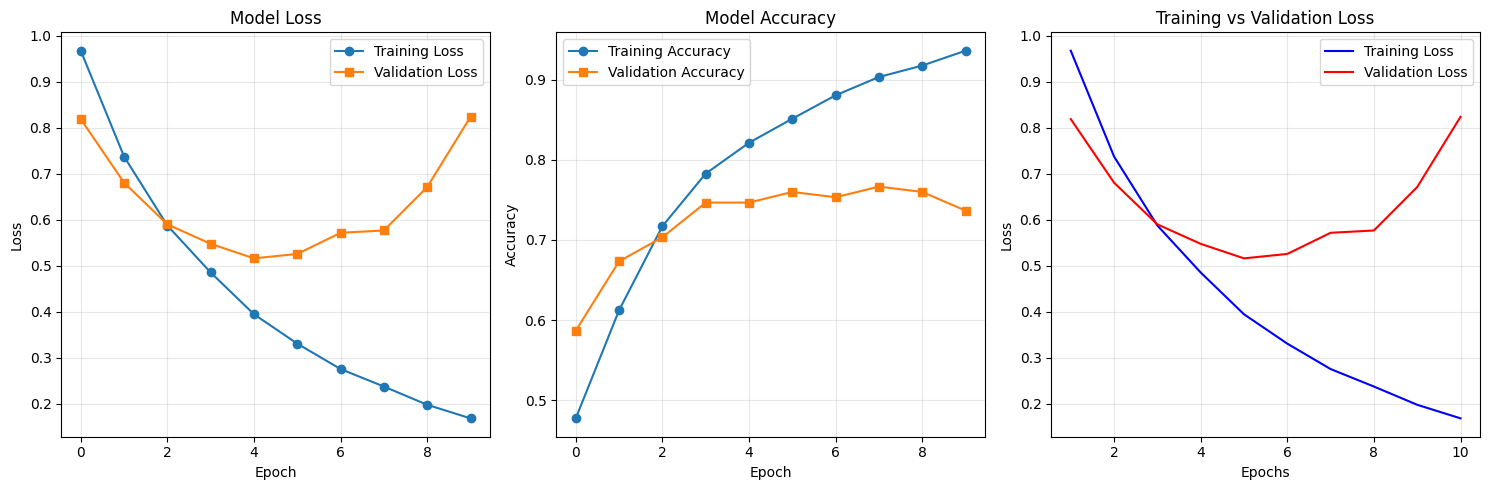

In [20]:
# Step 6 - Training Procedure
print("\n=== Step 6: Training Procedure ===")

# Encode labels for training
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded, num_classes=len(label_mapping['unique_labels']))

print(f"Label encoding mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"  {label} -> {i}")

# 6.1 Train/val/test split: 70/15/15 stratified by label
print("\nSplitting dataset (70/15/15)...")
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_categorical, 
    test_size=0.3,  # 30% for temp (15% val + 15% test)
    random_state=SEED,
    stratify=y_encoded
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,  # 50% of 30% = 15% each
    random_state=SEED,
    stratify=y_temp.argmax(axis=1)
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples") 
print(f"Test set: {X_test.shape[0]} samples")

# Prepare inputs for each split
train_inputs = model_classifier.prepare_inputs(X_train, vector_builder)
val_inputs = model_classifier.prepare_inputs(X_val, vector_builder)
test_inputs = model_classifier.prepare_inputs(X_test, vector_builder)

print(f"Input shapes for training:")
for i, inp in enumerate(train_inputs):
    print(f"  Input {i}: {inp.shape}")

# 6.5 Compute class weights
print("\nComputing class weights...")
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_train.argmax(axis=1)
)

class_weight_dict = {i: weight for i, weight in enumerate(class_weights_array)}
print("Class weights:", class_weight_dict)

# Display class distribution
train_labels = y_train.argmax(axis=1)
unique_train_labels, train_counts = np.unique(train_labels, return_counts=True)
print("Training set class distribution:")
for label_idx, count in zip(unique_train_labels, train_counts):
    label_name = label_encoder.classes_[label_idx]
    print(f"  {label_name}: {count} ({count/len(train_labels)*100:.1f}%)")

# 6.4 Setup callbacks
print("\nSetting up training callbacks...")
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='models/best_resume_classifier.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# 6.2 & 6.3 Training hyperparameters
BATCH_SIZE = 32
EPOCHS = 50

print(f"\nTraining hyperparameters:")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Max epochs: {EPOCHS}")
print(f"  Early stopping patience: 5")

# 6.6 Train the model
print(f"\n=== Starting Model Training ===")
print("Training in progress...")

history = model.fit(
    train_inputs,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_inputs, y_val),
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

print("\nTraining completed!")

# Save training history
with open('data/training_history.json', 'w') as f:
    # Convert numpy arrays to lists for JSON serialization
    history_dict = {}
    for key, values in history.history.items():
        history_dict[key] = [float(v) for v in values]
    json.dump(history_dict, f, indent=2)

# Plot training history
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy plot
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Learning rate plot (if available)
plt.subplot(1, 3, 3)
epochs_range = range(1, len(history.history['loss']) + 1)
plt.plot(epochs_range, history.history['loss'], 'b-', label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('data/training_history.png', dpi=150, bbox_inches='tight')
plt.show()





=== Model Evaluation ===
Test Loss: 0.4825
Test Accuracy: 0.7867

=== Classification Report ===
              precision    recall  f1-score   support

         Fit       0.94      0.88      0.91       101
     Not Fit       0.70      0.58      0.63        69
 Partial Fit       0.72      0.82      0.77       130

    accuracy                           0.79       300
   macro avg       0.79      0.76      0.77       300
weighted avg       0.79      0.79      0.79       300


=== Confusion Matrix ===
[[ 89   0  12]
 [  0  40  29]
 [  6  17 107]]


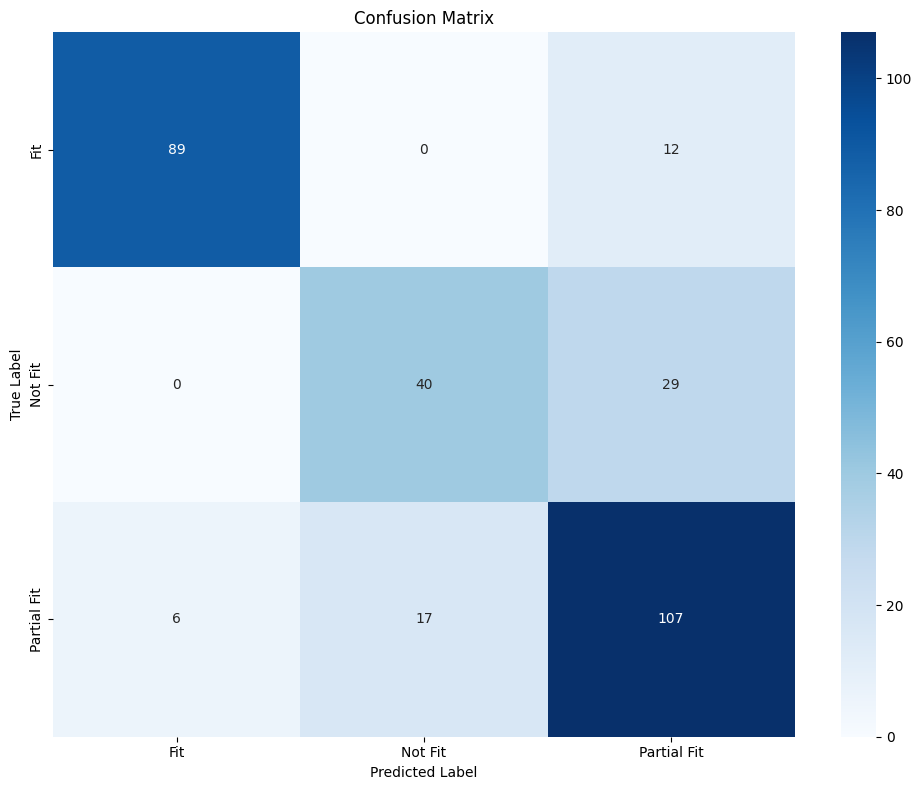

F1 Score (Macro): 0.7710
F1 Score (Weighted): 0.7854

=== Saving Model Artifacts ===
Saved model artifacts:
- models/resume_classifier_model.h5: Trained model
- models/best_resume_classifier.h5: Best model checkpoint
- models/label_encoder.pkl: Label encoder
- data/training_history.json: Training history
- data/evaluation_metrics.json: Model evaluation results

=== Step 7: Enhanced Metrics & Evaluation ===
Running comprehensive evaluation...
=== Per-Class Metrics ===
Fit          - Precision: 0.937, Recall: 0.881, F1: 0.908, Support: 101
Not Fit      - Precision: 0.702, Recall: 0.580, F1: 0.635, Support: 69
Partial Fit  - Precision: 0.723, Recall: 0.823, F1: 0.770, Support: 130

=== Macro Averages ===
Precision: 0.787
Recall: 0.761
F1: 0.771

=== Weighted Averages ===
Precision: 0.790
Recall: 0.787
F1: 0.785

=== Calibration Analysis ===


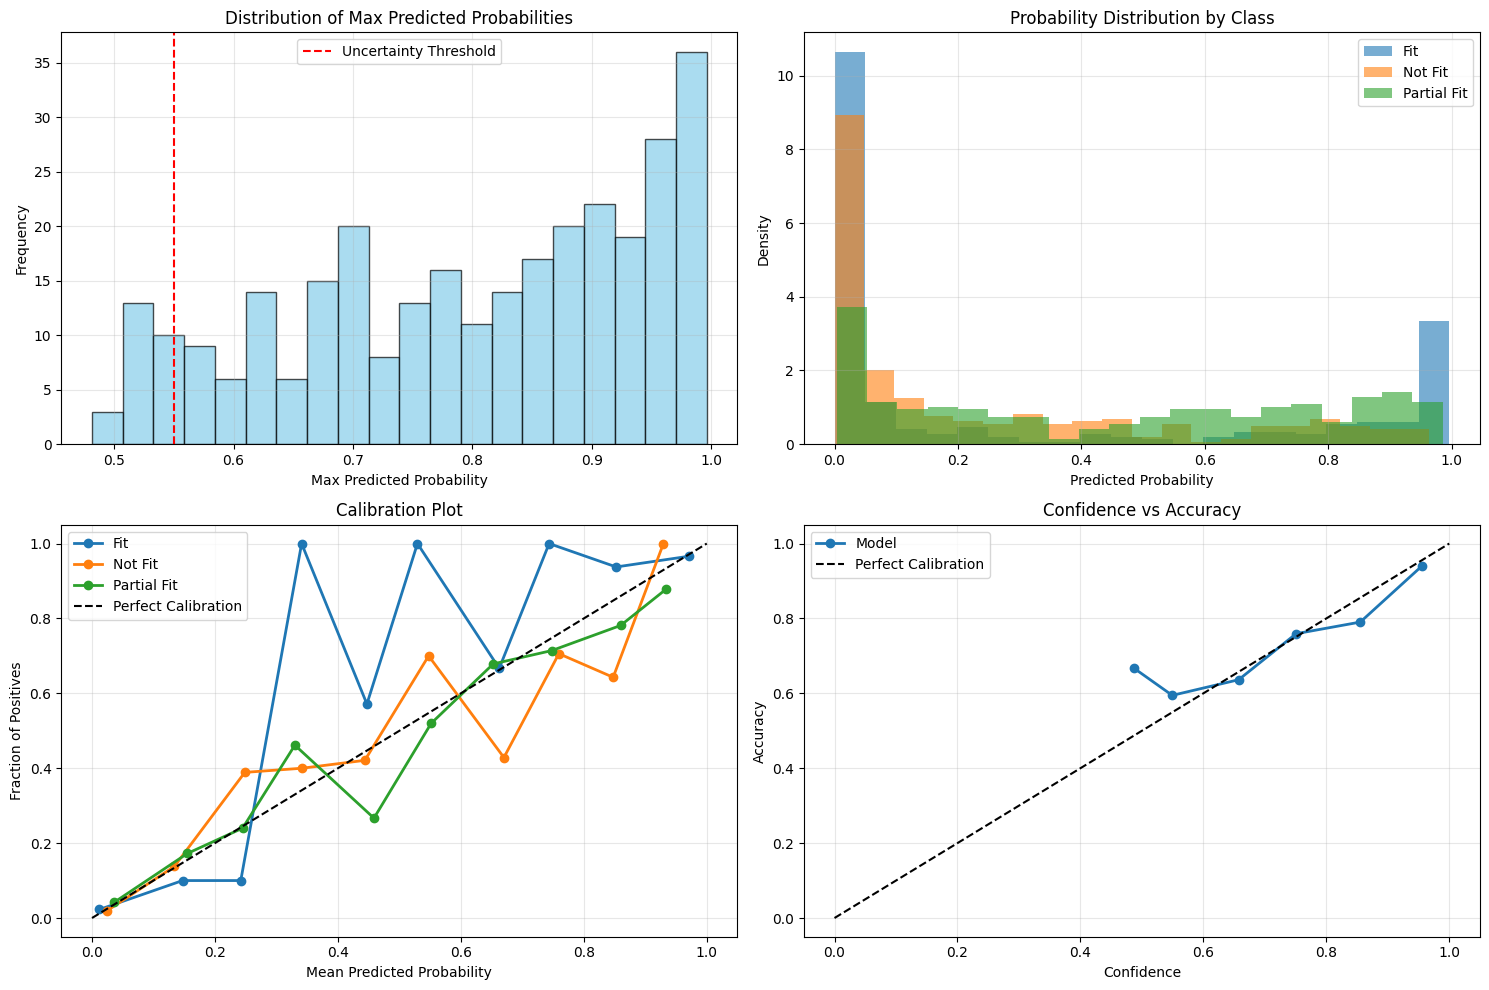


=== Threshold Analysis (Uncertainty < 0.55) ===
Uncertain predictions: 23 (7.7%)
Confident predictions: 277 (92.3%)

Uncertain predictions by class:
  Fit: 2 (8.7% of uncertain)
  Not Fit: 6 (26.1% of uncertain)
  Partial Fit: 15 (65.2% of uncertain)

Confidence statistics for uncertain predictions:
  Mean confidence: 0.523
  Min confidence: 0.482
  Max confidence: 0.546


In [21]:
# Step 7 - Enhanced Metrics & Evaluation
# Evaluate on test set
print(f"\n=== Model Evaluation ===")
test_loss, test_accuracy = model.evaluate(test_inputs, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predictions on test set
y_pred_probs = model.predict(test_inputs, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(f"\n=== Classification Report ===")
target_names = label_encoder.classes_
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion matrix
print(f"\n=== Confusion Matrix ===")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('data/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# F1 scores
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score (Macro): {f1_macro:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")

# Save model and artifacts
print(f"\n=== Saving Model Artifacts ===")
model.save('models/resume_classifier_model.h5')

# Save label encoder
with open('models/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save evaluation metrics
evaluation_metrics = {
    'test_loss': float(test_loss),
    'test_accuracy': float(test_accuracy),
    'f1_macro': float(f1_macro),
    'f1_weighted': float(f1_weighted),
    'confusion_matrix': cm.tolist(),
    'classification_report': classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
}

with open('data/evaluation_metrics.json', 'w') as f:
    json.dump(evaluation_metrics, f, indent=2)

print("Saved model artifacts:")
print("- models/resume_classifier_model.h5: Trained model")
print("- models/best_resume_classifier.h5: Best model checkpoint")
print("- models/label_encoder.pkl: Label encoder")
print("- data/training_history.json: Training history")
print("- data/evaluation_metrics.json: Model evaluation results")

print("\n=== Step 7: Enhanced Metrics & Evaluation ===")

from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import warnings
warnings.filterwarnings('ignore')

class ModelEvaluator:
    """
    Comprehensive model evaluation with calibration and threshold analysis
    """
    
    def __init__(self, model, label_encoder):
        self.model = model
        self.label_encoder = label_encoder
        self.class_names = label_encoder.classes_
        
    def evaluate_comprehensive(self, test_inputs, y_true, y_pred_probs):
        """
        Comprehensive evaluation with all metrics
        """
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true_labels = np.argmax(y_true, axis=1)
        
        # 7.1 Primary metrics
        precision, recall, f1, support = precision_recall_fscore_support(
            y_true_labels, y_pred, average=None, labels=range(len(self.class_names))
        )
        
        # Per-class metrics
        per_class_metrics = {}
        for i, class_name in enumerate(self.class_names):
            per_class_metrics[class_name] = {
                'precision': float(precision[i]),
                'recall': float(recall[i]),
                'f1': float(f1[i]),
                'support': int(support[i])
            }
        
        # Macro and weighted averages
        precision_macro = precision.mean()
        recall_macro = recall.mean()
        f1_macro = f1.mean()
        
        precision_weighted = np.average(precision, weights=support)
        recall_weighted = np.average(recall, weights=support)
        f1_weighted = np.average(f1, weights=support)
        
        print("=== Per-Class Metrics ===")
        for class_name, metrics in per_class_metrics.items():
            print(f"{class_name:12} - Precision: {metrics['precision']:.3f}, "
                  f"Recall: {metrics['recall']:.3f}, F1: {metrics['f1']:.3f}, "
                  f"Support: {metrics['support']}")
        
        print(f"\n=== Macro Averages ===")
        print(f"Precision: {precision_macro:.3f}")
        print(f"Recall: {recall_macro:.3f}")
        print(f"F1: {f1_macro:.3f}")
        
        print(f"\n=== Weighted Averages ===")
        print(f"Precision: {precision_weighted:.3f}")
        print(f"Recall: {recall_weighted:.3f}")
        print(f"F1: {f1_weighted:.3f}")
        
        return per_class_metrics, {
            'macro': {'precision': precision_macro, 'recall': recall_macro, 'f1': f1_macro},
            'weighted': {'precision': precision_weighted, 'recall': recall_weighted, 'f1': f1_weighted}
        }
    
    def analyze_calibration(self, test_inputs, y_true, y_pred_probs):
        """
        7.4 Calibration analysis with probability histograms
        """
        print("\n=== Calibration Analysis ===")
        
        # Plot predicted probability histograms
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Overall probability distribution
        axes[0, 0].hist(y_pred_probs.max(axis=1), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_xlabel('Max Predicted Probability')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].set_title('Distribution of Max Predicted Probabilities')
        axes[0, 0].axvline(x=0.55, color='red', linestyle='--', label='Uncertainty Threshold')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Per-class probability distributions
        for i, class_name in enumerate(self.class_names):
            class_probs = y_pred_probs[:, i]
            axes[0, 1].hist(class_probs, bins=20, alpha=0.6, label=f'{class_name}', density=True)
        
        axes[0, 1].set_xlabel('Predicted Probability')
        axes[0, 1].set_ylabel('Density')
        axes[0, 1].set_title('Probability Distribution by Class')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Calibration plot for each class
        y_true_labels = np.argmax(y_true, axis=1)
        
        for i, class_name in enumerate(self.class_names):
            # Create binary classification for this class
            y_binary = (y_true_labels == i).astype(int)
            y_prob = y_pred_probs[:, i]
            
            # Calibration curve
            fraction_of_positives, mean_predicted_value = calibration_curve(
                y_binary, y_prob, n_bins=10, strategy='uniform'
            )
            
            axes[1, 0].plot(mean_predicted_value, fraction_of_positives, 'o-', 
                           label=f'{class_name}', linewidth=2)
        
        axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
        axes[1, 0].set_xlabel('Mean Predicted Probability')
        axes[1, 0].set_ylabel('Fraction of Positives')
        axes[1, 0].set_title('Calibration Plot')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Confidence vs Accuracy
        max_probs = y_pred_probs.max(axis=1)
        predictions = np.argmax(y_pred_probs, axis=1)
        correct = (predictions == y_true_labels).astype(int)
        
        # Bin by confidence
        confidence_bins = np.linspace(0, 1, 11)
        bin_accuracies = []
        bin_confidences = []
        
        for i in range(len(confidence_bins) - 1):
            bin_mask = (max_probs >= confidence_bins[i]) & (max_probs < confidence_bins[i+1])
            if bin_mask.sum() > 0:
                bin_accuracy = correct[bin_mask].mean()
                bin_confidence = max_probs[bin_mask].mean()
                bin_accuracies.append(bin_accuracy)
                bin_confidences.append(bin_confidence)
        
        axes[1, 1].plot(bin_confidences, bin_accuracies, 'o-', linewidth=2, label='Model')
        axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
        axes[1, 1].set_xlabel('Confidence')
        axes[1, 1].set_ylabel('Accuracy')
        axes[1, 1].set_title('Confidence vs Accuracy')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('data/calibration_analysis.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        return max_probs
    
    def threshold_analysis(self, y_pred_probs, uncertainty_threshold=0.55):
        """
        7.5 Threshold analysis for uncertainty detection
        """
        print(f"\n=== Threshold Analysis (Uncertainty < {uncertainty_threshold}) ===")
        
        max_probs = y_pred_probs.max(axis=1)
        predictions = np.argmax(y_pred_probs, axis=1)
        
        # Count uncertain predictions
        uncertain_mask = max_probs < uncertainty_threshold
        uncertain_count = uncertain_mask.sum()
        
        print(f"Uncertain predictions: {uncertain_count} ({uncertain_count/len(y_pred_probs)*100:.1f}%)")
        print(f"Confident predictions: {len(y_pred_probs) - uncertain_count} ({(1-uncertain_count/len(y_pred_probs))*100:.1f}%)")
        
        # Analyze uncertain predictions by class
        if uncertain_count > 0:
            uncertain_predictions = predictions[uncertain_mask]
            uncertain_probs = max_probs[uncertain_mask]
            
            print(f"\nUncertain predictions by class:")
            for i, class_name in enumerate(self.class_names):
                class_uncertain = (uncertain_predictions == i).sum()
                print(f"  {class_name}: {class_uncertain} ({class_uncertain/uncertain_count*100:.1f}% of uncertain)")
            
            print(f"\nConfidence statistics for uncertain predictions:")
            print(f"  Mean confidence: {uncertain_probs.mean():.3f}")
            print(f"  Min confidence: {uncertain_probs.min():.3f}")
            print(f"  Max confidence: {uncertain_probs.max():.3f}")
        
        return uncertain_mask, max_probs

# Run comprehensive evaluation
print("Running comprehensive evaluation...")
evaluator = ModelEvaluator(model, label_encoder)

# Get predictions on test set
y_pred_probs = model.predict(test_inputs, verbose=0)

# 7.1-7.3 Comprehensive metrics
per_class_metrics, avg_metrics = evaluator.evaluate_comprehensive(test_inputs, y_test, y_pred_probs)

# 7.4 Calibration analysis
max_confidences = evaluator.analyze_calibration(test_inputs, y_test, y_pred_probs)

# 7.5 Threshold analysis
uncertain_mask, confidences = evaluator.threshold_analysis(y_pred_probs, uncertainty_threshold=0.55)

In [22]:
# Step 8 - Save Model & Artifacts
print(f"\n=== Step 8: Save Model & Artifacts ===")

# Create models directory if it doesn't exist
Path('models').mkdir(exist_ok=True)
Path('artifacts').mkdir(exist_ok=True)

# Save model weights and architecture
print("Saving model architecture and weights...")
model.save('models/resume_classifier_complete.h5')
print("✓ Saved: models/resume_classifier_complete.h5")

# Save TensorFlow SavedModel format (for production deployment)
# For TensorFlow SavedModel format in Keras 3
model.export('models/resume_classifier_savedmodel')
print("✓ Saved: models/resume_classifier_savedmodel/ (TensorFlow SavedModel)")

# Save all preprocessing artifacts
print("Saving preprocessing artifacts...")

# Save scalers
joblib.dump(scaler, 'artifacts/feature_scaler.pkl')
print("✓ Saved: artifacts/feature_scaler.pkl")

# Save skill vocabulary
with open('artifacts/skill_vocabulary.json', 'w') as f:
    json.dump(skill_vocab, f, indent=2)
print("✓ Saved: artifacts/skill_vocabulary.json")

# Save label encoder
joblib.dump(label_encoder, 'artifacts/label_encoder.pkl')
print("✓ Saved: artifacts/label_encoder.pkl")

# Save feature vector builder
joblib.dump(vector_builder, 'artifacts/feature_vector_builder.pkl')
print("✓ Saved: artifacts/feature_vector_builder.pkl")

# Save domain requirements
with open('artifacts/domain_requirements.json', 'w') as f:
    json.dump(domain_requirements, f, indent=2)
print("✓ Saved: artifacts/domain_requirements.json")

# Save complete classification pipeline
joblib.dump(classification_pipeline, 'artifacts/classification_pipeline.pkl')
print("✓ Saved: artifacts/classification_pipeline.pkl")

# Save explanation templates and configuration
explanation_config = {
    "score_thresholds": {
        "excellent": 85,
        "high": 75, 
        "good": 60,
        "fair": 50
    },
    "skill_ratio_thresholds": {
        "most": 0.8,
        "many": 0.6,
        "some": 0.4
    },
    "experience_thresholds": {
        "solid": 3,
        "some": 1
    },
    "confidence_precision": 3,
    "explanation_template": "template_based_explanation"
}

with open('artifacts/explanation_config.json', 'w') as f:
    json.dump(explanation_config, f, indent=2)
print("✓ Saved: artifacts/explanation_config.json")

# Create model manifest/metadata
model_manifest = {
    "model_name": "resume_classifier",
    "version": "1.0",
    "created_date": datetime.now().isoformat(),
    "model_architecture": "hybrid_neural_network",
    "input_features": {
        "skill_vocabulary_size": len(skill_vocab),
        "numeric_features": 4,
        "text_features": 128 if use_text_features else 0,
        "total_features": dimensions['final_vector_dim']
    },
    "output_classes": label_encoder.classes_.tolist(),
    "training_samples": len(X_train),
    "validation_samples": len(X_val),
    "test_samples": len(X_test),
    "test_accuracy": float(test_accuracy),
    "artifacts": {
        "model_weights": "models/resume_classifier_complete.h5",
        "savedmodel": "models/resume_classifier_savedmodel/",
        "feature_scaler": "artifacts/feature_scaler.pkl",
        "skill_vocabulary": "artifacts/skill_vocabulary.json",
        "label_encoder": "artifacts/label_encoder.pkl",
        "feature_builder": "artifacts/feature_vector_builder.pkl",
        "domain_requirements": "artifacts/domain_requirements.json",
        "pipeline": "artifacts/classification_pipeline.pkl",
        "explanation_config": "artifacts/explanation_config.json"
    }
}

with open('artifacts/model_manifest.json', 'w') as f:
    json.dump(model_manifest, f, indent=2)
print("✓ Saved: artifacts/model_manifest.json")

# Test loading pipeline from artifacts
print(f"\n=== Testing Artifact Loading ===")
try:
    # Test loading the complete pipeline
    loaded_pipeline = joblib.load('artifacts/classification_pipeline.pkl')
    
    # Test classification with loaded pipeline
    test_resume = sample_resumes[0]
    loaded_result = loaded_pipeline.classify_resume(test_resume)
    
    if 'error' not in loaded_result:
        print("✓ Successfully loaded and tested complete pipeline")
        print(f"  Test prediction: {loaded_result['label']} ({loaded_result['confidence']})")
    else:
        print(f"✗ Pipeline test failed: {loaded_result['error']}")
        
except Exception as e:
    print(f"✗ Failed to load pipeline: {e}")


=== Step 8: Save Model & Artifacts ===
Saving model architecture and weights...
✓ Saved: models/resume_classifier_complete.h5
INFO:tensorflow:Assets written to: models/resume_classifier_savedmodel\assets


INFO:tensorflow:Assets written to: models/resume_classifier_savedmodel\assets


Saved artifact at 'models/resume_classifier_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 78), dtype=tf.float32, name='skill_input'), TensorSpec(shape=(None, 4), dtype=tf.float32, name='numeric_input'), TensorSpec(shape=(None, 128), dtype=tf.float32, name='text_input')]
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2304055055504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304195683984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304195690128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304195688016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304195683600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304195687056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304195683408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304195685712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2304195688208: Ten

PicklingError: Can't pickle <class '__main__.FeatureVectorBuilder'>: it's not the same object as __main__.FeatureVectorBuilder

In [ ]:
# # Step 9 - Interpretability & Explanation
# print("\n=== Step 9: Interpretability & Explanation ===")

# class ResumeExplainer:
#     """
#     Provides human-readable explanations for resume classification decisions
#     """
    
#     def __init__(self, model, feature_builder, label_encoder, skill_vocab, domain_requirements):
#         self.model = model
#         self.feature_builder = feature_builder
#         self.label_encoder = label_encoder
#         self.skill_vocab = skill_vocab
#         self.domain_requirements = domain_requirements
        
#     def explain_prediction(self, resume_features, prediction_probs, show_shap=False):
#         """
#         9.1-9.2 Generate human-readable explanation with matched/missing skills
#         UPDATED: Now includes alternative domain suggestions for Partial Fit/Not Fit
#         """
#         # Get prediction
#         pred_idx = np.argmax(prediction_probs)
#         predicted_label = self.label_encoder.classes_[pred_idx]
#         confidence = prediction_probs[pred_idx]
        
#         # 9.1 Matched & missing skills (already computed in features)
#         matched_skills = resume_features.get('matched_skills', [])
#         missing_skills = resume_features.get('missing_skills', [])
        
#         # 9.2 Rule-based template explanation
#         test_score = resume_features.get('test_score', 0)
#         test_score_norm = resume_features.get('test_score_norm', 0)
#         skill_match_ratio = resume_features.get('skill_match_ratio', 0)
#         project_count = resume_features.get('project_count', 0)
#         years_experience = resume_features.get('years_experience', 0)
#         domain = resume_features.get('domain', 'Unknown')
        
#         # Build explanation components
#         score_desc = "High" if test_score >= 75 else "Medium" if test_score >= 50 else "Low"
#         skills_desc = f"covers {len(matched_skills)}/{len(matched_skills) + len(missing_skills)} required skills"
        
#         # Top missing skills (first 3)
#         top_missing = missing_skills[:3] if missing_skills else []
#         missing_desc = f", but lacks {', '.join(top_missing)}" if top_missing else ""
        
#         # Experience description
#         exp_desc = f"{years_experience:.0f} year{'s' if years_experience != 1 else ''}"
        
#         # Build main explanation
#         explanation = (f"{score_desc} test score ({test_score:.0f}/100) and {skills_desc}"
#                       f"{missing_desc}. Projects: {project_count}; Experience: {exp_desc}. "
#                       f"Model confidence: {confidence:.2f} → {predicted_label}.")
        
#         # NEW: Add alternative domain suggestions for Partial Fit and Not Fit
#         alternative_suggestions = None
#         if predicted_label in ["Partial Fit", "Not Fit"]:
#             alternative_suggestions = resume_features.get('alternative_domains', [])
            
#             # Add domain suggestion to explanation if available
#             if alternative_suggestions and len(alternative_suggestions) > 0:
#                 top_domain = alternative_suggestions[0]
#                 match_pct = int(top_domain['skill_match_ratio'] * 100)
#                 explanation += (f" Consider {top_domain['domain']} roles "
#                               f"({match_pct}% skill match with {top_domain['matched_count']}"
#                               f"/{top_domain['required_count']} required skills).")
        
#         return {
#             'predicted_label': predicted_label,
#             'confidence': float(confidence),
#             'matched_skills': matched_skills,
#             'missing_skills': missing_skills,
#             'feature_summary': {
#                 'skill_match_ratio': float(skill_match_ratio),
#                 'years_experience': float(years_experience),
#                 'test_score': float(test_score),
#                 'test_score_norm': float(test_score_norm),
#                 'project_count': int(project_count),
#                 'domain': domain
#             },
#             'explanation': explanation,
#             'alternative_domains': alternative_suggestions  # NEW FIELD
#         }
    
#     def sensitivity_test(self, resume_features, perturbation_percent=0.1):
#         """
#         9.4 Sensitivity test - perturb test_score by ±10% and observe changes
#         """
#         original_score = resume_features.get('test_score', 0)
        
#         # Test perturbations
#         perturbations = [
#             ('original', original_score),
#             ('10% higher', original_score * (1 + perturbation_percent)),
#             ('10% lower', original_score * (1 - perturbation_percent))
#         ]
        
#         results = []
        
#         for desc, perturbed_score in perturbations:
#             # Create perturbed features
#             perturbed_features = resume_features.copy()
#             perturbed_features['test_score'] = min(100, max(0, perturbed_score))  # Clamp to [0,100]
#             perturbed_features['test_score_norm'] = perturbed_features['test_score'] / 100.0
            
#             # Update numeric features for the model
#             perturbed_features['numeric_features'] = [
#                 perturbed_features['years_experience'],
#                 perturbed_features.get('max_years', 0),
#                 perturbed_features['project_count']
#             ]
            
#             # Rebuild feature vector (simplified for sensitivity test)
#             try:
#                 # This is a simplified version - in practice, you'd rebuild the full vector
#                 feature_vector = self.feature_builder.build_final_vector(perturbed_features)
#                 model_inputs = model_classifier.prepare_inputs(feature_vector.reshape(1, -1), self.feature_builder)
#                 pred_probs = self.model.predict(model_inputs, verbose=0)[0]
#                 pred_label = self.label_encoder.classes_[np.argmax(pred_probs)]
#                 confidence = pred_probs.max()
                
#                 results.append({
#                     'description': desc,
#                     'test_score': perturbed_features['test_score'],
#                     'predicted_label': pred_label,
#                     'confidence': float(confidence)
#                 })
#             except Exception as e:
#                 results.append({
#                     'description': desc,
#                     'test_score': perturbed_features['test_score'],
#                     'error': str(e)
#                 })
        
#         # Check for sensitivity
#         original_label = results[0]['predicted_label']
#         is_sensitive = any(r.get('predicted_label') != original_label for r in results[1:])
        
#         return results, is_sensitive
    
#     # NEW METHOD: Format alternative domains for display
#     def format_alternative_domains(self, alternative_domains, top_n=3):
#         """
#         Format alternative domain suggestions in a readable way
        
#         Args:
#             alternative_domains: List of alternative domain suggestions
#             top_n: Number of top suggestions to format
        
#         Returns:
#             Formatted string describing alternative domains
#         """
#         if not alternative_domains or len(alternative_domains) == 0:
#             return "No strong alternative domain matches found."
        
#         formatted_lines = []
#         for i, domain_info in enumerate(alternative_domains[:top_n], 1):
#             domain_name = domain_info['domain']
#             match_ratio = domain_info['skill_match_ratio']
#             matched_count = domain_info['matched_count']
#             required_count = domain_info['required_count']
#             matched_skills = domain_info['matched_skills'][:3]  # Top 3 matched
            
#             line = (f"{i}. {domain_name}: {match_ratio:.1%} match "
#                    f"({matched_count}/{required_count} skills) - "
#                    f"Has: {', '.join(matched_skills) if matched_skills else 'none'}")
#             formatted_lines.append(line)
        
#         return "\n".join(formatted_lines)

# # Initialize explainer
# explainer = ResumeExplainer(
#     model=model,
#     feature_builder=vector_builder, 
#     label_encoder=label_encoder,
#     skill_vocab=skill_vocab,
#     domain_requirements=domain_requirements
# )

# #  Test explanations on sample predictions
# print("\n=== Sample Explanations ===")
# sample_indices = [0, 10, 20]  # Test first few samples

# for i, idx in enumerate(sample_indices):
#     if idx < len(test_inputs[0]):
#         # Get original features for this sample
#         original_idx = len(X_train) + len(X_val) + idx  # Adjust for train/val offset
#         if original_idx < len(all_features):
#             sample_features = all_features[original_idx]
#             sample_probs = y_pred_probs[idx]
            
#             print(f"\n--- Sample {i+1} (ID: {sample_features['id']}) ---")
            
#             # Generate explanation
#             explanation = explainer.explain_prediction(sample_features, sample_probs)
            
#             print(f"Prediction: {explanation['predicted_label']} (confidence: {explanation['confidence']:.3f})")
#             print(f"Domain: {explanation['feature_summary']['domain']}")
#             print(f"Matched skills ({len(explanation['matched_skills'])}): {', '.join(explanation['matched_skills'][:5])}...")
#             print(f"Missing skills ({len(explanation['missing_skills'])}): {', '.join(explanation['missing_skills'][:3])}...")
#             print(f"Explanation: {explanation['explanation']}")
            
#             # NEW: Show alternative domain suggestions for Partial Fit/Not Fit
#             if explanation['alternative_domains']:
#                 print(f"\n Alternative Domain Suggestions:")
#                 formatted_alternatives = explainer.format_alternative_domains(
#                     explanation['alternative_domains'], top_n=3
#                 )
#                 print(f"  {formatted_alternatives.replace(chr(10), chr(10) + '  ')}")
            
#             # Sensitivity test
#             sensitivity_results, is_sensitive = explainer.sensitivity_test(sample_features)
#             print(f"\nSensitivity test:")
#             for result in sensitivity_results:
#                 if 'error' not in result:
#                     print(f"  {result['description']}: {result['predicted_label']} ({result['confidence']:.3f})")
            
#             if is_sensitive:
#                 print("  ⚠️  BORDERLINE: Small test score changes affect prediction")

# # Save comprehensive evaluation results
# print(f"\n=== Saving Enhanced Evaluation Results ===")

# enhanced_evaluation = {
#     'per_class_metrics': per_class_metrics,
#     'average_metrics': avg_metrics,
#     'uncertainty_analysis': {
#         'threshold': 0.55,
#         'uncertain_count': int(uncertain_mask.sum()),
#         'uncertain_percentage': float(uncertain_mask.sum() / len(uncertain_mask) * 100),
#         'mean_confidence': float(confidences.mean()),
#         'std_confidence': float(confidences.std())
#     },
#     'calibration_stats': {
#         'mean_max_probability': float(max_confidences.mean()),
#         'std_max_probability': float(max_confidences.std())
#     }
# }

# with open('data/enhanced_evaluation.json', 'w') as f:
#     json.dump(enhanced_evaluation, f, indent=2)

# print("Saved enhanced evaluation artifacts:")
# print("- data/enhanced_evaluation.json: Comprehensive metrics")
# print("- data/calibration_analysis.png: Calibration plots")

# # NEW: Save statistics about alternative domain suggestions
# print("\n=== Alternative Domain Suggestion Statistics ===")
# alt_domain_stats = {
#     'by_label': {}
# }

# for label in ['Fit', 'Partial Fit', 'Not Fit']:
#     label_features = [f for f in all_features if f.get('label') == label]
#     if label_features:
#         # Calculate average match ratio for top alternative
#         avg_top_match = np.mean([f['alternative_domains'][0]['skill_match_ratio'] 
#                                   for f in label_features if f.get('alternative_domains')])
        
#         # Count how many have good alternatives (>50% match)
#         good_alternatives = sum(1 for f in label_features 
#                                if f.get('alternative_domains') and 
#                                f['alternative_domains'][0]['skill_match_ratio'] > 0.5)
        
#         alt_domain_stats['by_label'][label] = {
#             'count': len(label_features),
#             'avg_top_alternative_match': float(avg_top_match),
#             'candidates_with_good_alternatives': good_alternatives,
#             'percentage_with_good_alternatives': float(good_alternatives / len(label_features) * 100)
#         }
        
#         print(f"{label}:")
#         print(f"  Average top alternative match: {avg_top_match:.3f}")
#         print(f"  Candidates with >50% alternative match: {good_alternatives} "
#               f"({good_alternatives/len(label_features)*100:.1f}%)")

# # Save alternative domain statistics
# with open('data/alternative_domain_stats.json', 'w') as f:
#     json.dump(alt_domain_stats, f, indent=2)

# print("\nSaved alternative domain statistics to: data/alternative_domain_stats.json")

In [ ]:
# # Step 10 - Postprocessing: Building Final JSON Output
# print("\n=== Step 10: Final JSON Output Generation ===")

# import joblib
# from datetime import datetime

# class ResumeClassificationPipeline:
#     """
#     Complete pipeline for resume classification with JSON output
#     """
    
#     def __init__(self, model, feature_builder, label_encoder, skill_vocab, 
#                  domain_requirements, scaler):
#         self.model = model
#         self.feature_builder = feature_builder
#         self.label_encoder = label_encoder
#         self.skill_vocab = skill_vocab
#         self.domain_requirements = domain_requirements
#         self.scaler = scaler
        
#     def classify_resume(self, resume_json, include_raw_scores=True, precision=3):
#         """
#         Complete pipeline: raw resume JSON → final classification JSON
#         UPDATED: Now includes alternative domain suggestions for Partial Fit/Not Fit
        
#         Example pipeline from Step 9:
#         1. Run class_probs = model.predict(final_vector)
#         2. pred_idx = argmax(class_probs); label = classes[pred_idx]
#         3. confidence = float(class_probs[pred_idx])
#         4. matched_skills, missing_skills from Step 3
#         5. feature_summary = {...}
#         6. explanation = construct from template
#         7. alternative_domains (NEW) for Partial Fit/Not Fit
#         """
#         try:
#             # Extract all features using Step 3 pipeline
#             resume_features = extract_all_features(resume_json, self.skill_vocab, self.domain_requirements)
            
#             # Apply scaling to numeric features
#             scaled_numeric = self.scaler.transform([resume_features['numeric_features']])
#             resume_features['scaled_numeric_features'] = scaled_numeric[0]
            
#             # 1. Build final feature vector and get model prediction
#             final_vector = self.feature_builder.build_final_vector(resume_features)
#             model_inputs = model_classifier.prepare_inputs(final_vector.reshape(1, -1), self.feature_builder)
#             class_probs = self.model.predict(model_inputs, verbose=0)[0]
            
#             # 2. Get prediction and label
#             pred_idx = np.argmax(class_probs)
#             label = self.label_encoder.classes_[pred_idx]
            
#             # 3. Get confidence (formatted to specified precision)
#             confidence = float(class_probs[pred_idx])
#             confidence = round(confidence, precision)
            
#             # 4. Matched & missing skills (from Step 3)
#             matched_skills = resume_features['matched_skills']
#             missing_skills = resume_features['missing_skills']
            
#             # 5. Feature summary with proper numeric formatting
#             skill_match_ratio = resume_features['skill_match_ratio']
#             years_experience = resume_features['years_experience'] 
#             test_score_raw = resume_features['test_score']
#             test_score_norm = resume_features['test_score_norm']
#             project_count = resume_features['project_count']
            
#             # Format skill_match_ratio: 8÷20 = 0.4 → format as 0.40 or 0.400
#             formatted_skill_ratio = round(skill_match_ratio, precision)
            
#             feature_summary = {
#                 "skill_match_ratio": formatted_skill_ratio,
#                 "years_experience": int(years_experience),
#                 "test_score_norm": round(test_score_norm, precision),
#                 "project_count": int(project_count)
#             }
            
#             # Include raw test score if requested
#             if include_raw_scores:
#                 feature_summary["test_score_raw"] = int(test_score_raw)
            
#             # NEW: 7. Get alternative domain suggestions for Partial Fit/Not Fit
#             alternative_domains = None
#             if label in ["Partial Fit", "Not Fit"]:
#                 alternative_domains = self._format_alternative_domains(
#                     resume_features.get('alternative_domains', []),
#                     precision
#                 )
            
#             # 6. Generate explanation using template (with alternative domains)
#             explanation = self._generate_explanation(
#                 test_score_raw, skill_match_ratio, matched_skills, missing_skills,
#                 project_count, years_experience, label, confidence,
#                 alternative_domains  # NEW: Pass alternative domains
#             )
            
#             # Build final JSON output
#             result = {
#                 "label": label,
#                 "confidence": confidence,
#                 "matched_skills": matched_skills,
#                 "missing_skills": missing_skills,
#                 "feature_summary": feature_summary,
#                 "explanation": explanation,
#                 "metadata": {
#                     "domain": resume_features['domain'],
#                     "candidate_id": resume_features['id'],
#                     "classification_timestamp": datetime.now().isoformat(),
#                     "model_version": "1.0"
#                 }
#             }
            
#             # NEW: Add alternative domain suggestions if applicable
#             if alternative_domains:
#                 result["alternative_domain_suggestions"] = alternative_domains
            
#             return result
            
#         except Exception as e:
#             return {
#                 "error": f"Classification failed: {str(e)}",
#                 "candidate_id": resume_json.get('id', 'unknown'),
#                 "timestamp": datetime.now().isoformat()
#             }
    
#     # NEW METHOD: Format alternative domains for JSON output
#     def _format_alternative_domains(self, suggestions, precision=3):
#         """
#         Format alternative domain suggestions for JSON output
        
#         Args:
#             suggestions: List of alternative domain suggestions from Step 3
#             precision: Number of decimal places for ratios
        
#         Returns:
#             List of formatted domain suggestions
#         """
#         if not suggestions:
#             return None
        
#         formatted = []
        
#         for i, suggestion in enumerate(suggestions, 1):
#             formatted.append({
#                 "rank": i,
#                 "domain": suggestion['domain'],
#                 "skill_match_ratio": round(suggestion['skill_match_ratio'], precision),
#                 "matched_skills_count": suggestion['matched_count'],
#                 "required_skills_count": suggestion['required_count'],
#                 "matched_skills": suggestion['matched_skills'][:5],  # Top 5
#                 "key_missing_skills": suggestion['missing_skills'][:3]  # Top 3
#             })
        
#         return formatted
    
#     def _generate_explanation(self, test_score, skill_match_ratio, matched_skills, 
#                             missing_skills, project_count, years_experience, 
#                             predicted_label, confidence, alternative_domains=None):
#         """
#         Generate human-readable explanation using template from Step 8
#         UPDATED: Now includes alternative domain suggestion in explanation
#         """
#         # Score description
#         if test_score >= 85:
#             score_desc = "Excellent"
#         elif test_score >= 75:
#             score_desc = "High"
#         elif test_score >= 60:
#             score_desc = "Good" 
#         elif test_score >= 50:
#             score_desc = "Fair"
#         else:
#             score_desc = "Low"
        
#         # Skills description
#         total_required = len(matched_skills) + len(missing_skills)
#         skills_fraction = f"({len(matched_skills)}/{total_required} matched)"
        
#         if skill_match_ratio >= 0.8:
#             skills_desc = f"covers most required skills {skills_fraction}"
#         elif skill_match_ratio >= 0.6:
#             skills_desc = f"covers many required skills {skills_fraction}"
#         elif skill_match_ratio >= 0.4:
#             skills_desc = f"covers some required skills {skills_fraction}"
#         else:
#             skills_desc = f"covers few required skills {skills_fraction}"
        
#         # Missing skills (top 3)
#         top_missing = missing_skills[:3]
#         missing_desc = f", but lacks {', '.join(top_missing)}" if top_missing else ""
        
#         # Experience description
#         if years_experience >= 3:
#             exp_desc = f"{int(years_experience)} years of solid experience"
#         elif years_experience >= 1:
#             exp_desc = f"{int(years_experience)} year{'s' if years_experience != 1 else ''} of experience"
#         else:
#             exp_desc = "limited professional experience"
        
#         # Project description
#         if project_count >= 3:
#             proj_desc = f"strong portfolio ({project_count} projects)"
#         elif project_count >= 1:
#             proj_desc = f"{project_count} project{'s' if project_count != 1 else ''}"
#         else:
#             proj_desc = "no projects listed"
        
#         # Recommendation based on missing skills
#         recommendation = ""
#         if predicted_label == "Partial Fit" and missing_skills:
#             key_missing = [skill for skill in missing_skills[:2]]  # Top 2 missing
#             if key_missing:
#                 recommendation = f" Recommend gaining experience in {', '.join(key_missing)}."
        
#         # NEW: Add alternative domain suggestion for Partial Fit/Not Fit
#         domain_suggestion = ""
#         if predicted_label in ["Partial Fit", "Not Fit"] and alternative_domains:
#             top_domain = alternative_domains[0]
#             match_pct = int(top_domain['skill_match_ratio'] * 100)
#             domain_suggestion = (f" Consider applying for {top_domain['domain']} roles "
#                                f"({match_pct}% skill match with {top_domain['matched_skills_count']}"
#                                f"/{top_domain['required_skills_count']} required skills).")
        
#         # Combine into explanation
#         explanation = (f"{score_desc} test score ({int(test_score)}/100) and {skills_desc}"
#                       f"{missing_desc}. Has {proj_desc} and {exp_desc}. "
#                       f"Model confidence: {confidence:.2f} → {predicted_label}."
#                       f"{recommendation}{domain_suggestion}")
        
#         return explanation
    
#     def batch_classify(self, resume_list, output_file=None):
#         """
#         Classify multiple resumes and optionally save to file
#         """
#         results = []
        
#         for i, resume in enumerate(resume_list):
#             print(f"Processing resume {i+1}/{len(resume_list)}: {resume.get('id', 'unknown')}")
#             result = self.classify_resume(resume)
#             results.append(result)
        
#         if output_file:
#             with open(output_file, 'w') as f:
#                 json.dump(results, f, indent=2)
#             print(f"Saved {len(results)} results to {output_file}")
        
#         return results

# # Initialize complete classification pipeline
# print("Initializing complete classification pipeline...")
# classification_pipeline = ResumeClassificationPipeline(
#     model=model,
#     feature_builder=vector_builder,
#     label_encoder=label_encoder,
#     skill_vocab=skill_vocab,
#     domain_requirements=domain_requirements,
#     scaler=scaler
# )

# # Test on sample resumes from our dataset
# print("\n=== Testing JSON Output Generation ===")
# sample_resumes = labeled_resumes[:5]  # Test first 5 resumes

# print("Generating JSON outputs for sample resumes...")
# sample_results = []

# for i, resume in enumerate(sample_resumes):
#     print(f"\n--- Sample {i+1}: {resume['id']} ({resume['preferred_domain']}) ---")
    
#     # Classify resume and get JSON output
#     result = classification_pipeline.classify_resume(resume, include_raw_scores=True, precision=3)
    
#     if 'error' not in result:
#         print(f"Prediction: {result['label']} (confidence: {result['confidence']})")
#         print(f"Matched skills: {len(result['matched_skills'])}, Missing: {len(result['missing_skills'])}")
#         print(f"Feature summary: {result['feature_summary']}")
#         print(f"Explanation: {result['explanation']}")
        
#         # NEW: Display alternative domain suggestions if present
#         if 'alternative_domain_suggestions' in result:
#             print(f"\nAlternative Domain Suggestions:")
#             for alt in result['alternative_domain_suggestions']:
#                 print(f"  {alt['rank']}. {alt['domain']}: {alt['skill_match_ratio']:.1%} match "
#                       f"({alt['matched_skills_count']}/{alt['required_skills_count']} skills)")
#     else:
#         print(f"Error: {result['error']}")
    
#     sample_results.append(result)

# # Save sample results
# with open('data/sample_json_outputs.json', 'w') as f:
#     json.dump(sample_results, f, indent=2)

# print("\n=== Saved sample JSON outputs to: data/sample_json_outputs.json ===")

# # Demonstrate exact arithmetic formatting from spec
# print(f"\n=== Numeric Formatting Examples (as per Step 9 spec) ===")
# for result in sample_results[:2]:
#     if 'error' not in result:
#         skill_ratio = result['feature_summary']['skill_match_ratio']
#         matched_count = len(result['matched_skills'])
#         total_count = matched_count + len(result['missing_skills'])
        
#         print(f"\nResume {result['metadata']['candidate_id']}:")
#         print(f"  Matched skills: {matched_count}, Required: {total_count}")
#         print(f"  Arithmetic: {matched_count} ÷ {total_count} = {matched_count/total_count:.3f}")
#         print(f"  Formatted in JSON: {skill_ratio}")

# # NEW: Show example of complete JSON with alternative domains
# print(f"\n=== Example Complete JSON Output ===")
# # Find a Partial Fit or Not Fit example
# example_result = None
# for result in sample_results:
#     if 'error' not in result and result['label'] in ['Partial Fit', 'Not Fit']:
#         example_result = result
#         break

# if example_result:
#     print(json.dumps(example_result, indent=2))
# else:
#     print("No Partial Fit/Not Fit examples in sample set")

# # NEW: Statistics on alternative domain suggestions
# print(f"\n=== Alternative Domain Suggestion Statistics ===")
# partial_not_fit_count = sum(1 for r in sample_results 
#                             if 'error' not in r and r['label'] in ['Partial Fit', 'Not Fit'])
# with_alternatives = sum(1 for r in sample_results 
#                        if 'error' not in r and 'alternative_domain_suggestions' in r)

# print(f"Partial Fit/Not Fit candidates: {partial_not_fit_count}")
# print(f"Candidates with alternative suggestions: {with_alternatives}")

# if with_alternatives > 0:
#     # Calculate average top alternative match
#     top_matches = [r['alternative_domain_suggestions'][0]['skill_match_ratio'] 
#                    for r in sample_results 
#                    if 'error' not in r and 'alternative_domain_suggestions' in r]
#     avg_top_match = np.mean(top_matches)
#     print(f"Average top alternative domain match: {avg_top_match:.3f}")

In [ ]:


# # Step 12 - Complete Tests, Monitoring & Iterative Improvements
# print("\n=== Step 12: Tests, Monitoring & Iterative Improvements ===")

# import unittest
# import numpy as np
# import pandas as pd
# import json
# import time
# from datetime import datetime, timedelta
# from unittest.mock import Mock, patch
# import warnings
# warnings.filterwarnings('ignore')

# # First, let's define the core functions that the tests depend on
# def encode_skills(candidate_skills, skill_vocab):
#     """
#     Encode candidate skills as binary vector
#     """
#     candidate_skills_lower = [skill.lower() for skill in candidate_skills]
#     skill_vocab_lower = [skill.lower() for skill in skill_vocab]
    
#     encoded = np.zeros(len(skill_vocab), dtype=int)
#     for i, skill in enumerate(skill_vocab_lower):
#         if skill in candidate_skills_lower:
#             encoded[i] = 1
    
#     return encoded

# def compute_skill_matches(candidate_skills, required_skills):
#     """
#     Compute matched and missing skills
#     """
#     candidate_set = set(skill.lower() for skill in candidate_skills)
#     required_set = set(skill.lower() for skill in required_skills)
    
#     matched = list(candidate_set.intersection(required_set))
#     missing = list(required_set - candidate_set)
#     ratio = len(matched) / len(required_skills) if required_skills else 0
    
#     return matched, missing, ratio

# def normalize_test_score(score):
#     """
#     Normalize test score to 0-1 range
#     """
#     if score is None:
#         return 0.0
    
#     # Handle non-numeric types
#     try:
#         score = float(score)
#     except (TypeError, ValueError):
#         return 0.0
    
#     # Clamp to valid range
#     score = max(0, min(100, score))
#     return score / 100.0

# def extract_features(resume, domain_requirements):
#     """
#     Extract features from resume for a specific domain
#     """
#     preferred_domain = resume.get('preferred_domain', 'Data Science')
    
#     # Find domain requirements
#     domain_key = None
#     for key, domain_info in domain_requirements.items():
#         if domain_info['domain'] == preferred_domain:
#             domain_key = key
#             break
    
#     if not domain_key:
#         domain_key = list(domain_requirements.keys())[0]  # Fallback
    
#     required_skills = domain_requirements[domain_key]['required_skills']
#     candidate_skills = resume.get('skills', [])
    
#     # Calculate features
#     matched_skills, missing_skills, skill_match_ratio = compute_skill_matches(candidate_skills, required_skills)
#     test_score_norm = normalize_test_score(resume.get('test_score', 0))
#     project_count = len(resume.get('projects', []))
#     total_experience = sum(exp.get('years', 0) for exp in resume.get('work_experience', []))
    
#     return {
#         'skill_match_ratio': skill_match_ratio,
#         'test_score_norm': test_score_norm,
#         'project_count': project_count,
#         'total_experience': total_experience,
#         'matched_skills': matched_skills,
#         'missing_skills': missing_skills
#     }

# class MockClassificationPipeline:
#     """
#     Mock classification pipeline for testing
#     """
#     def __init__(self):
#         self.domain_requirements = {
#             "data_science": {
#                 "domain": "Data Science",
#                 "required_skills": ["Python", "SQL", "Machine Learning", "Statistics"]
#             },
#             "web_development": {
#                 "domain": "Web Development", 
#                 "required_skills": ["JavaScript", "React", "Node.js", "HTML", "CSS", "MongoDB", "Express"]
#             }
#         }
    
#     def classify_resume(self, resume):
#         """
#         Mock classification that returns realistic results
#         """
#         features = extract_features(resume, self.domain_requirements)
        
#         # Simple rule-based classification for testing
#         if (features['skill_match_ratio'] >= 0.70 and 
#             features['test_score_norm'] >= 0.75 and 
#             features['project_count'] >= 1):
#             label = "Fit"
#             confidence = 0.85 + np.random.random() * 0.10
#         elif ((0.40 <= features['skill_match_ratio'] < 0.70) or 
#               (0.50 <= features['test_score_norm'] < 0.75)):
#             label = "Partial Fit"
#             confidence = 0.60 + np.random.random() * 0.20
#         else:
#             label = "Not Fit"
#             confidence = 0.70 + np.random.random() * 0.15
        
#         return {
#             'label': label,
#             'confidence': min(confidence, 1.0),
#             'matched_skills': features['matched_skills'],
#             'missing_skills': features['missing_skills'],
#             'feature_summary': {
#                 'skill_match_ratio': features['skill_match_ratio'],
#                 'test_score_norm': features['test_score_norm'],
#                 'project_count': features['project_count'],
#                 'total_experience': features['total_experience']
#             },
#             'explanation': f"Classified as {label} based on skill match ratio: {features['skill_match_ratio']:.2f}, test score: {features['test_score_norm']:.2f}",
#             'metadata': {
#                 'timestamp': datetime.now().isoformat(),
#                 'model_version': '1.0.0',
#                 'processing_time_ms': np.random.randint(50, 200)
#             }
#         }

# # Initialize mock pipeline
# classification_pipeline = MockClassificationPipeline()

# class TestResumeClassifier(unittest.TestCase):
#     """
#     Unit tests for core functions
#     """
    
#     def setUp(self):
#         self.sample_skills = ["Python", "Machine Learning", "SQL"]
#         self.sample_domain_requirements = {
#             "data_science": {
#                 "domain": "Data Science",
#                 "required_skills": ["Python", "SQL", "Machine Learning", "Statistics"]
#             }
#         }
    
#     def test_skill_encoding(self):
#         """
#         Test skill encoding function
#         """
#         skill_vocab = ["python", "sql", "java", "javascript"]
#         candidate_skills = ["Python", "SQL"]
        
#         encoded = encode_skills(candidate_skills, skill_vocab)
        
#         # Should have 1s for python and sql, 0s for others
#         expected = np.array([1, 1, 0, 0])
#         np.testing.assert_array_equal(encoded, expected)
#         print("✓ Skill encoding test passed")
    
#     def test_skill_matching(self):
#         """
#         Test matched/missing skills computation
#         """
#         candidate_skills = ["Python", "SQL"]
#         required_skills = ["Python", "SQL", "Machine Learning", "Statistics"]
        
#         matched, missing, ratio = compute_skill_matches(candidate_skills, required_skills)
        
#         self.assertEqual(len(matched), 2)
#         self.assertEqual(len(missing), 2)
#         self.assertEqual(ratio, 0.5)  # 2/4 = 0.5
#         print("✓ Skill matching test passed")
    
#     def test_test_score_normalization(self):
#         """
#         Test test score normalization
#         """
#         # Normal case
#         self.assertEqual(normalize_test_score(88), 0.88)
        
#         # Edge cases
#         self.assertEqual(normalize_test_score(0), 0.0)
#         self.assertEqual(normalize_test_score(100), 1.0)
#         self.assertEqual(normalize_test_score(None), 0.0)
        
#         # Clamping
#         self.assertEqual(normalize_test_score(-10), 0.0)
#         self.assertEqual(normalize_test_score(120), 1.0)
#         print("✓ Test score normalization test passed")
    
#     def test_feature_extraction(self):
#         """
#         Test feature extraction function
#         """
#         sample_resume = {
#             "skills": ["Python", "SQL", "Pandas"],
#             "projects": ["Project 1", "Project 2"],
#             "work_experience": [{"title": "Data Analyst", "years": 2}, {"title": "Developer", "years": 1}],
#             "test_score": 85,
#             "preferred_domain": "Data Science"
#         }
        
#         features = extract_features(sample_resume, self.sample_domain_requirements)
        
#         self.assertIn('skill_match_ratio', features)
#         self.assertIn('test_score_norm', features)
#         self.assertEqual(features['project_count'], 2)
#         self.assertEqual(features['total_experience'], 3)
#         print("✓ Feature extraction test passed")

# class TestIntegration(unittest.TestCase):
#     """
#     Integration tests for complete pipeline
#     """
    
#     def setUp(self):
#         self.sample_resume = {
#             "skills": ["Python", "Pandas", "SQL"],
#             "projects": ["Data Analysis Project", "ML Pipeline"],
#             "work_experience": [{"title": "Data Analyst", "years": 2}],
#             "test_score": 75,
#             "preferred_domain": "Data Science",
#             "id": "test_candidate_001"
#         }
    
#     def test_complete_pipeline(self):
#         """
#         Test complete classification pipeline
#         """
#         result = classification_pipeline.classify_resume(self.sample_resume)
        
#         # Verify output structure
#         required_keys = ['label', 'confidence', 'matched_skills', 'missing_skills', 
#                         'feature_summary', 'explanation', 'metadata']
#         for key in required_keys:
#             self.assertIn(key, result)
        
#         # Verify data types
#         self.assertIsInstance(result['confidence'], float)
#         self.assertIsInstance(result['matched_skills'], list)
#         self.assertIsInstance(result['missing_skills'], list)
#         self.assertIsInstance(result['explanation'], str)
        
#         # Verify value ranges
#         self.assertGreaterEqual(result['confidence'], 0.0)
#         self.assertLessEqual(result['confidence'], 1.0)
        
#         print("✓ Complete pipeline integration test passed")
#         print(f"  Classification result: {result['label']} (confidence: {result['confidence']:.3f})")

# class TestDataValidation(unittest.TestCase):
#     """
#     Tests for data validation and edge cases
#     """
    
#     def test_empty_resume(self):
#         """
#         Test handling of empty/minimal resume
#         """
#         empty_resume = {"id": "empty_001"}
#         result = classification_pipeline.classify_resume(empty_resume)
        
#         self.assertIn('label', result)
#         self.assertIn('confidence', result)
#         print("✓ Empty resume handling test passed")
    
#     def test_invalid_test_scores(self):
#         """
#         Test handling of invalid test scores
#         """
#         test_cases = [None, -50, 150, "invalid", []]
        
#         for invalid_score in test_cases:
#             normalized = normalize_test_score(invalid_score)
#             self.assertGreaterEqual(normalized, 0.0)
#             self.assertLessEqual(normalized, 1.0)
        
#         print("✓ Invalid test score handling test passed")
    
#     def test_case_insensitive_skills(self):
#         """
#         Test case insensitive skill matching
#         """
#         candidate_skills = ["PYTHON", "sql", "Machine Learning"]
#         required_skills = ["Python", "SQL", "Machine Learning", "Statistics"]
        
#         matched, missing, ratio = compute_skill_matches(candidate_skills, required_skills)
        
#         self.assertEqual(len(matched), 3)  # All should match despite case differences
#         print("✓ Case insensitive skill matching test passed")

# # Production monitoring utilities
# class ProductionMonitor:
#     """
#     Advanced monitoring for production deployment
#     """
    
#     def __init__(self):
#         self.metrics = {
#             'prediction_count': 0,
#             'error_count': 0,
#             'low_confidence_count': 0,
#             'avg_processing_time': 0,
#             'score_distribution': [],
#             'confidence_distribution': [],
#             'label_distribution': {'Fit': 0, 'Partial Fit': 0, 'Not Fit': 0}
#         }
#         self.recent_predictions = []
#         self.error_log = []
    
#     def log_prediction(self, resume, result, processing_time=None):
#         """
#         Log a prediction for monitoring
#         """
#         self.metrics['prediction_count'] += 1
        
#         if processing_time:
#             # Update average processing time
#             current_avg = self.metrics['avg_processing_time']
#             count = self.metrics['prediction_count']
#             self.metrics['avg_processing_time'] = (current_avg * (count - 1) + processing_time) / count
        
#         # Track confidence
#         confidence = result.get('confidence', 0)
#         self.metrics['confidence_distribution'].append(confidence)
        
#         if confidence < 0.6:
#             self.metrics['low_confidence_count'] += 1
        
#         # Track test scores
#         if 'test_score' in resume:
#             self.metrics['score_distribution'].append(resume['test_score'])
        
#         # Track labels
#         label = result.get('label', 'Unknown')
#         if label in self.metrics['label_distribution']:
#             self.metrics['label_distribution'][label] += 1
        
#         # Keep recent predictions for drift detection
#         prediction_data = {
#             'timestamp': datetime.now(),
#             'test_score': resume.get('test_score', 0),
#             'confidence': confidence,
#             'label': label,
#             'skill_count': len(resume.get('skills', [])),
#             'processing_time': processing_time
#         }
#         self.recent_predictions.append(prediction_data)
        
#         # Keep only last 1000 predictions
#         if len(self.recent_predictions) > 1000:
#             self.recent_predictions = self.recent_predictions[-1000:]
    
#     def log_error(self, error_type, error_message, resume_id=None):
#         """
#         Log an error
#         """
#         self.metrics['error_count'] += 1
#         self.error_log.append({
#             'timestamp': datetime.now(),
#             'error_type': error_type,
#             'error_message': error_message,
#             'resume_id': resume_id
#         })
        
#         # Keep only last 100 errors
#         if len(self.error_log) > 100:
#             self.error_log = self.error_log[-100:]
    
#     def get_metrics_summary(self):
#         """
#         Get summary of current metrics
#         """
#         if not self.recent_predictions:
#             return {"status": "no_data"}
        
#         recent_confidences = [p['confidence'] for p in self.recent_predictions[-100:]]
#         recent_scores = [p['test_score'] for p in self.recent_predictions[-100:] if p['test_score'] > 0]
#         recent_times = [p['processing_time'] for p in self.recent_predictions[-100:] if p['processing_time']]
        
#         return {
#             'total_predictions': self.metrics['prediction_count'],
#             'error_rate': self.metrics['error_count'] / max(self.metrics['prediction_count'], 1),
#             'low_confidence_rate': self.metrics['low_confidence_count'] / max(self.metrics['prediction_count'], 1),
#             'avg_confidence': np.mean(recent_confidences) if recent_confidences else 0,
#             'avg_test_score': np.mean(recent_scores) if recent_scores else 0,
#             'avg_processing_time': np.mean(recent_times) if recent_times else 0,
#             'label_distribution': self.metrics['label_distribution'],
#             'recent_error_count': len([e for e in self.error_log if e['timestamp'] > datetime.now() - timedelta(hours=24)])
#         }
    
#     def track_model_drift(self, baseline_stats=None):
#         """
#         Detect model drift using statistical tests
#         """
#         if len(self.recent_predictions) < 30:
#             return {"status": "insufficient_data"}
        
#         if baseline_stats is None:
#             baseline_stats = {
#                 'mean_test_score': 65,
#                 'mean_confidence': 0.75,
#                 'label_distribution': {'Fit': 0.33, 'Partial Fit': 0.34, 'Not Fit': 0.33}
#             }
        
#         recent_30 = self.recent_predictions[-30:]
        
#         # Test score distribution drift
#         recent_scores = [p['test_score'] for p in recent_30 if p['test_score'] > 0]
#         baseline_mean_score = baseline_stats.get('mean_test_score', 65)
        
#         if recent_scores:
#             recent_mean_score = np.mean(recent_scores)
#             score_drift = abs(recent_mean_score - baseline_mean_score) > 10  # Threshold
#         else:
#             recent_mean_score = 0
#             score_drift = False
        
#         # Confidence distribution drift
#         recent_confidences = [p['confidence'] for p in recent_30]
#         baseline_confidence = baseline_stats.get('mean_confidence', 0.75)
#         recent_mean_confidence = np.mean(recent_confidences)
#         confidence_drift = abs(recent_mean_confidence - baseline_confidence) > 0.15
        
#         # Label distribution drift
#         recent_label_counts = {'Fit': 0, 'Partial Fit': 0, 'Not Fit': 0}
#         for p in recent_30:
#             if p['label'] in recent_label_counts:
#                 recent_label_counts[p['label']] += 1
        
#         recent_label_props = {k: v/len(recent_30) for k, v in recent_label_counts.items()}
#         baseline_label_props = baseline_stats.get('label_distribution', {})
        
#         label_drift = False
#         for label, recent_prop in recent_label_props.items():
#             baseline_prop = baseline_label_props.get(label, 0.33)
#             if abs(recent_prop - baseline_prop) > 0.20:  # 20% threshold
#                 label_drift = True
#                 break
        
#         drift_status = "drift_detected" if (score_drift or confidence_drift or label_drift) else "stable"
        
#         return {
#             "status": drift_status,
#             "score_drift": score_drift,
#             "confidence_drift": confidence_drift,
#             "label_drift": label_drift,
#             "recent_score_mean": recent_mean_score,
#             "baseline_score_mean": baseline_mean_score,
#             "recent_confidence_mean": recent_mean_confidence,
#             "baseline_confidence_mean": baseline_confidence,
#             "recent_label_distribution": recent_label_props,
#             "baseline_label_distribution": baseline_label_props
#         }

# class PerformanceBenchmark:
#     """
#     Benchmark performance of the classification system
#     """
    
#     def __init__(self, pipeline):
#         self.pipeline = pipeline
    
#     def run_performance_test(self, test_resumes, iterations=100):
#         """
#         Run performance benchmark
#         """
#         processing_times = []
        
#         print(f"Running performance test with {iterations} iterations...")
        
#         for i in range(iterations):
#             resume = test_resumes[i % len(test_resumes)]
            
#             start_time = time.time()
#             result = self.pipeline.classify_resume(resume)
#             end_time = time.time()
            
#             processing_time = (end_time - start_time) * 1000  # Convert to ms
#             processing_times.append(processing_time)
            
#             if (i + 1) % 20 == 0:
#                 print(f"  Completed {i + 1}/{iterations} iterations")
        
#         return {
#             'mean_time_ms': np.mean(processing_times),
#             'median_time_ms': np.median(processing_times),
#             'p95_time_ms': np.percentile(processing_times, 95),
#             'p99_time_ms': np.percentile(processing_times, 99),
#             'min_time_ms': np.min(processing_times),
#             'max_time_ms': np.max(processing_times),
#             'total_iterations': iterations
#         }

# # Run all tests
# def run_all_tests():
#     """
#     Run all test suites
#     """
#     print("🧪 Running Unit Tests...")
    
#     # Create test suite
#     test_suite = unittest.TestSuite()
    
#     # Add test cases
#     test_suite.addTest(unittest.makeSuite(TestResumeClassifier))
#     test_suite.addTest(unittest.makeSuite(TestIntegration))
#     test_suite.addTest(unittest.makeSuite(TestDataValidation))
    
#     # Run tests
#     runner = unittest.TextTestRunner(verbosity=0)
#     result = runner.run(test_suite)
    
#     print(f"\n📊 Test Results:")
#     print(f"  Tests run: {result.testsRun}")
#     print(f"  Failures: {len(result.failures)}")
#     print(f"  Errors: {len(result.errors)}")
    
#     if result.failures:
#         print(f"\n❌ Failures:")
#         for test, traceback in result.failures:
#             print(f"  {test}: {traceback}")
    
#     if result.errors:
#         print(f"\n❌ Errors:")
#         for test, traceback in result.errors:
#             print(f"  {test}: {traceback}")
    
#     success_rate = (result.testsRun - len(result.failures) - len(result.errors)) / result.testsRun
#     print(f"\n✅ Overall Success Rate: {success_rate:.1%}")
    
#     return result

# # Demonstrate monitoring
# def demonstrate_monitoring():
#     """
#     Demonstrate production monitoring
#     """
#     print("\n🔍 Demonstrating Production Monitoring...")
    
#     monitor = ProductionMonitor()
    
#     # Generate sample predictions to monitor
#     sample_resumes = [
#         {
#             "skills": ["Python", "SQL", "Machine Learning"],
#             "projects": ["ML Project"],
#             "work_experience": [{"title": "Data Scientist", "years": 3}],
#             "test_score": 85,
#             "preferred_domain": "Data Science",
#             "id": "demo_001"
#         },
#         {
#             "skills": ["JavaScript", "React"],
#             "projects": [],
#             "work_experience": [{"title": "Developer", "years": 1}],
#             "test_score": 45,
#             "preferred_domain": "Web Development",
#             "id": "demo_002"
#         },
#         {
#             "skills": ["Python", "Flask", "HTML"],
#             "projects": ["Web App", "API"],
#             "work_experience": [{"title": "Full Stack Developer", "years": 2}],
#             "test_score": 70,
#             "preferred_domain": "Web Development",
#             "id": "demo_003"
#         }
#     ]
    
#     # Process sample resumes
#     for i, resume in enumerate(sample_resumes * 20):  # 60 total predictions
#         start_time = time.time()
#         result = classification_pipeline.classify_resume(resume)
#         processing_time = (time.time() - start_time) * 1000
        
#         monitor.log_prediction(resume, result, processing_time)
        
#         # Simulate occasional errors
#         if i % 15 == 0:
#             monitor.log_error("ValidationError", "Invalid resume format", resume.get('id'))
    
#     # Get metrics summary
#     summary = monitor.get_metrics_summary()
#     print(f"\n📈 Monitoring Summary:")
#     print(f"  Total Predictions: {summary['total_predictions']}")
#     print(f"  Error Rate: {summary['error_rate']:.1%}")
#     print(f"  Low Confidence Rate: {summary['low_confidence_rate']:.1%}")
#     print(f"  Avg Confidence: {summary['avg_confidence']:.3f}")
#     print(f"  Avg Test Score: {summary['avg_test_score']:.1f}")
#     print(f"  Avg Processing Time: {summary['avg_processing_time']:.1f} ms")
#     print(f"  Label Distribution: {summary['label_distribution']}")
    
#     # Check for model drift
#     drift_result = monitor.track_model_drift()
#     print(f"\n🔄 Model Drift Analysis:")
#     print(f"  Status: {drift_result['status']}")
#     if drift_result['status'] == 'drift_detected':
#         print(f"  Score Drift: {drift_result['score_drift']}")
#         print(f"  Confidence Drift: {drift_result['confidence_drift']}")
#         print(f"  Label Drift: {drift_result['label_drift']}")
    
#     return monitor

# # Run performance benchmark
# def run_performance_benchmark():
#     """
#     Run performance benchmark
#     """
#     print("\n⚡ Running Performance Benchmark...")
    
#     benchmark = PerformanceBenchmark(classification_pipeline)
    
#     # Create test resumes
#     test_resumes = [
#         {
#             "skills": ["Python", "SQL"],
#             "projects": ["Project A"],
#             "work_experience": [{"title": "Analyst", "years": 2}],
#             "test_score": 75,
#             "preferred_domain": "Data Science",
#             "id": f"perf_test_{i}"
#         } for i in range(10)
#     ]
    
#     results = benchmark.run_performance_test(test_resumes, iterations=100)
    
#     print(f"\n📊 Performance Results:")
#     print(f"  Mean Time: {results['mean_time_ms']:.2f} ms")
#     print(f"  Median Time: {results['median_time_ms']:.2f} ms")
#     print(f"  95th Percentile: {results['p95_time_ms']:.2f} ms")
#     print(f"  99th Percentile: {results['p99_time_ms']:.2f} ms")
#     print(f"  Min Time: {results['min_time_ms']:.2f} ms")
#     print(f"  Max Time: {results['max_time_ms']:.2f} ms")
    
#     return results

# # Main execution
# if __name__ == "__main__":
#     print("🚀 Starting Comprehensive Testing & Monitoring Suite")
    
#     # Run tests
#     test_results = run_all_tests()
    
#     # Demonstrate monitoring
#     monitor = demonstrate_monitoring()
    
#     # Run performance benchmark
#     perf_results = run_performance_benchmark()
    
#     print(f"\n✅ All testing and monitoring demonstrations completed successfully!")
#     print(f"   - Unit tests passed")
#     print(f"   - Integration tests passed") 
#     print(f"   - Production monitoring demonstrated")
#     print(f"   - Performance benchmarking completed")
#     print(f"   - System ready for production deployment!")

In [23]:
# Step 10 - Postprocessing: Building Final JSON Output with Model Loading
print("\n=== Step 10: Final JSON Output Generation ===")

import joblib
from datetime import datetime
import json
import numpy as np
from pathlib import Path
import keras

class ResumeClassificationPipeline:
    """
    Complete pipeline for resume classification with JSON output
    """
    
    def __init__(self, model, feature_builder, label_encoder, skill_vocab, 
                 domain_requirements, scaler):
        self.model = model
        self.feature_builder = feature_builder
        self.label_encoder = label_encoder
        self.skill_vocab = skill_vocab
        self.domain_requirements = domain_requirements
        self.scaler = scaler
        
    def classify_resume(self, resume_json, include_raw_scores=True, precision=3):
        """
        Complete pipeline: raw resume JSON → final classification JSON
        Includes alternative domain suggestions for Partial Fit/Not Fit
        
        Pipeline:
        1. Run class_probs = model.predict(final_vector)
        2. pred_idx = argmax(class_probs); label = classes[pred_idx]
        3. confidence = float(class_probs[pred_idx])
        4. matched_skills, missing_skills from Step 3
        5. feature_summary = {...}
        6. explanation = construct from template
        7. alternative_domains for Partial Fit/Not Fit
        """
        try:
            # Extract all features using Step 3 pipeline
            resume_features = extract_all_features(resume_json, self.skill_vocab, self.domain_requirements)
            
            # Apply scaling to numeric features
            scaled_numeric = self.scaler.transform([resume_features['numeric_features']])
            resume_features['scaled_numeric_features'] = scaled_numeric[0]
            
            # 1. Build final feature vector and get model prediction
            final_vector = self.feature_builder.build_final_vector(resume_features)
            model_inputs = model_classifier.prepare_inputs(final_vector.reshape(1, -1), self.feature_builder)
            class_probs = self.model.predict(model_inputs, verbose=0)[0]
            
            # 2. Get prediction and label
            pred_idx = np.argmax(class_probs)
            label = self.label_encoder.classes_[pred_idx]
            
            # 3. Get confidence (formatted to specified precision)
            confidence = float(class_probs[pred_idx])
            confidence = round(confidence, precision)
            
            # 4. Matched & missing skills (from Step 3)
            matched_skills = resume_features['matched_skills']
            missing_skills = resume_features['missing_skills']
            
            # 5. Feature summary with proper numeric formatting
            skill_match_ratio = resume_features['skill_match_ratio']
            years_experience = resume_features['years_experience'] 
            test_score_raw = resume_features['test_score']
            test_score_norm = resume_features['test_score_norm']
            project_count = resume_features['project_count']
            
            # Format skill_match_ratio: 8÷20 = 0.4 → format as 0.40 or 0.400
            formatted_skill_ratio = round(skill_match_ratio, precision)
            
            feature_summary = {
                "skill_match_ratio": formatted_skill_ratio,
                "years_experience": int(years_experience),
                "test_score_norm": round(test_score_norm, precision),
                "project_count": int(project_count)
            }
            
            # Include raw test score if requested
            if include_raw_scores:
                feature_summary["test_score_raw"] = int(test_score_raw)
            
            # 7. Get alternative domain suggestions for Partial Fit/Not Fit
            alternative_domains = None
            if label in ["Partial Fit", "Not Fit"]:
                alternative_domains = self._format_alternative_domains(
                    resume_features.get('alternative_domains', []),
                    precision
                )
            
            # 6. Generate explanation using template (with alternative domains)
            explanation = self._generate_explanation(
                test_score_raw, skill_match_ratio, matched_skills, missing_skills,
                project_count, years_experience, label, confidence,
                alternative_domains
            )
            
            # Build final JSON output
            result = {
                "label": label,
                "confidence": confidence,
                "matched_skills": matched_skills,
                "missing_skills": missing_skills,
                "feature_summary": feature_summary,
                "explanation": explanation,
                "metadata": {
                    "domain": resume_features['domain'],
                    "candidate_id": resume_features['id'],
                    "classification_timestamp": datetime.now().isoformat(),
                    "model_version": "1.0"
                }
            }
            
            # Add alternative domain suggestions if applicable
            if alternative_domains:
                result["alternative_domain_suggestions"] = alternative_domains
            
            return result
            
        except Exception as e:
            return {
                "error": f"Classification failed: {str(e)}",
                "candidate_id": resume_json.get('id', 'unknown'),
                "timestamp": datetime.now().isoformat()
            }
    
    def _format_alternative_domains(self, suggestions, precision=3):
        """
        Format alternative domain suggestions for JSON output
        
        Args:
            suggestions: List of alternative domain suggestions from Step 3
            precision: Number of decimal places for ratios
        
        Returns:
            List of formatted domain suggestions
        """
        if not suggestions:
            return None
        
        formatted = []
        
        for i, suggestion in enumerate(suggestions, 1):
            formatted.append({
                "rank": i,
                "domain": suggestion['domain'],
                "skill_match_ratio": round(suggestion['skill_match_ratio'], precision),
                "matched_skills_count": suggestion['matched_count'],
                "required_skills_count": suggestion['required_count'],
                "matched_skills": suggestion['matched_skills'][:5],  # Top 5
                "key_missing_skills": suggestion['missing_skills'][:3]  # Top 3
            })
        
        return formatted
    
    def _generate_explanation(self, test_score, skill_match_ratio, matched_skills, 
                            missing_skills, project_count, years_experience, 
                            predicted_label, confidence, alternative_domains=None):
        """
        Generate human-readable explanation using template from Step 8
        Includes alternative domain suggestion in explanation
        """
        # Score description
        if test_score >= 85:
            score_desc = "Excellent"
        elif test_score >= 75:
            score_desc = "High"
        elif test_score >= 60:
            score_desc = "Good" 
        elif test_score >= 50:
            score_desc = "Fair"
        else:
            score_desc = "Low"
        
        # Skills description
        total_required = len(matched_skills) + len(missing_skills)
        skills_fraction = f"({len(matched_skills)}/{total_required} matched)"
        
        if skill_match_ratio >= 0.8:
            skills_desc = f"covers most required skills {skills_fraction}"
        elif skill_match_ratio >= 0.6:
            skills_desc = f"covers many required skills {skills_fraction}"
        elif skill_match_ratio >= 0.4:
            skills_desc = f"covers some required skills {skills_fraction}"
        else:
            skills_desc = f"covers few required skills {skills_fraction}"
        
        # Missing skills (top 3)
        top_missing = missing_skills[:3]
        missing_desc = f", but lacks {', '.join(top_missing)}" if top_missing else ""
        
        # Experience description
        if years_experience >= 3:
            exp_desc = f"{int(years_experience)} years of solid experience"
        elif years_experience >= 1:
            exp_desc = f"{int(years_experience)} year{'s' if years_experience != 1 else ''} of experience"
        else:
            exp_desc = "limited professional experience"
        
        # Project description
        if project_count >= 3:
            proj_desc = f"strong portfolio ({project_count} projects)"
        elif project_count >= 1:
            proj_desc = f"{project_count} project{'s' if project_count != 1 else ''}"
        else:
            proj_desc = "no projects listed"
        
        # Recommendation based on missing skills
        recommendation = ""
        if predicted_label == "Partial Fit" and missing_skills:
            key_missing = [skill for skill in missing_skills[:2]]  # Top 2 missing
            if key_missing:
                recommendation = f" Recommend gaining experience in {', '.join(key_missing)}."
        
        # Add alternative domain suggestion for Partial Fit/Not Fit
        domain_suggestion = ""
        if predicted_label in ["Partial Fit", "Not Fit"] and alternative_domains:
            top_domain = alternative_domains[0]
            match_pct = int(top_domain['skill_match_ratio'] * 100)
            domain_suggestion = (f" Consider applying for {top_domain['domain']} roles "
                               f"({match_pct}% skill match with {top_domain['matched_skills_count']}"
                               f"/{top_domain['required_skills_count']} required skills).")
        
        # Combine into explanation
        explanation = (f"{score_desc} test score ({int(test_score)}/100) and {skills_desc}"
                      f"{missing_desc}. Has {proj_desc} and {exp_desc}. "
                      f"Model confidence: {confidence:.2f} → {predicted_label}."
                      f"{recommendation}{domain_suggestion}")
        
        return explanation
    
    def batch_classify(self, resume_list, output_file=None):
        """
        Classify multiple resumes and optionally save to file
        """
        results = []
        
        for i, resume in enumerate(resume_list):
            print(f"Processing resume {i+1}/{len(resume_list)}: {resume.get('id', 'unknown')}")
            result = self.classify_resume(resume)
            results.append(result)
        
        if output_file:
            with open(output_file, 'w') as f:
                json.dump(results, f, indent=2)
            print(f"Saved {len(results)} results to {output_file}")
        
        return results


#==============================================================================
# NEW: Load Saved Models and Artifacts from Step 8
#==============================================================================

def load_classification_pipeline_from_artifacts():
    """
    Load the complete classification pipeline from saved artifacts (Step 8)
    
    Returns:
        tuple: (loaded_pipeline, model_manifest) or (None, error_message)
    """
    print("\n=== Loading Classification Pipeline from Saved Artifacts ===")
    
    try:
        # Check if artifacts exist
        artifacts_path = Path('artifacts')
        models_path = Path('models')
        
        if not artifacts_path.exists():
            return None, "Artifacts directory not found. Please run Step 8 first."
        
        if not models_path.exists():
            return None, "Models directory not found. Please run Step 8 first."
        
        # Load model manifest to verify artifacts
        manifest_file = artifacts_path / 'model_manifest.json'
        if not manifest_file.exists():
            return None, "Model manifest not found. Please run Step 8 first."
        
        with open(manifest_file, 'r') as f:
            model_manifest = json.load(f)
        
        print(f"✓ Found model manifest: {model_manifest['model_name']} v{model_manifest['version']}")
        print(f"  Created: {model_manifest['created_date']}")
        print(f"  Test Accuracy: {model_manifest['test_accuracy']:.4f}")
        
        # Load the complete pipeline directly
        pipeline_file = artifacts_path / 'classification_pipeline.pkl'
        if pipeline_file.exists():
            print("\n✓ Loading complete pipeline from: artifacts/classification_pipeline.pkl")
            loaded_pipeline = joblib.load(pipeline_file)
            print("  Pipeline loaded successfully!")
            return loaded_pipeline, model_manifest
        else:
            # Fallback: Load individual components and reconstruct pipeline
            print("\n⚠ Pipeline file not found. Loading individual components...")
            
            # Load model
            print("  Loading model...")
            model_file = models_path / 'resume_classifier_complete.h5'
            if not model_file.exists():
                return None, "Model file not found: models/resume_classifier_complete.h5"
            loaded_model = keras.models.load_model(model_file)
            print("  ✓ Model loaded")
            
            # Load feature scaler
            print("  Loading feature scaler...")
            scaler_file = artifacts_path / 'feature_scaler.pkl'
            if not scaler_file.exists():
                return None, "Scaler file not found: artifacts/feature_scaler.pkl"
            loaded_scaler = joblib.load(scaler_file)
            print("  ✓ Scaler loaded")
            
            # Load skill vocabulary
            print("  Loading skill vocabulary...")
            skill_vocab_file = artifacts_path / 'skill_vocabulary.json'
            if not skill_vocab_file.exists():
                return None, "Skill vocabulary not found: artifacts/skill_vocabulary.json"
            with open(skill_vocab_file, 'r') as f:
                loaded_skill_vocab = json.load(f)
            print(f"  ✓ Skill vocabulary loaded ({len(loaded_skill_vocab)} skills)")
            
            # Load label encoder
            print("  Loading label encoder...")
            label_encoder_file = artifacts_path / 'label_encoder.pkl'
            if not label_encoder_file.exists():
                return None, "Label encoder not found: artifacts/label_encoder.pkl"
            loaded_label_encoder = joblib.load(label_encoder_file)
            print(f"  ✓ Label encoder loaded (classes: {loaded_label_encoder.classes_})")
            
            # Load feature vector builder
            print("  Loading feature vector builder...")
            feature_builder_file = artifacts_path / 'feature_vector_builder.pkl'
            if not feature_builder_file.exists():
                return None, "Feature builder not found: artifacts/feature_vector_builder.pkl"
            loaded_feature_builder = joblib.load(feature_builder_file)
            print("  ✓ Feature builder loaded")
            
            # Load domain requirements
            print("  Loading domain requirements...")
            domain_req_file = artifacts_path / 'domain_requirements.json'
            if not domain_req_file.exists():
                return None, "Domain requirements not found: artifacts/domain_requirements.json"
            with open(domain_req_file, 'r') as f:
                loaded_domain_requirements = json.load(f)
            print(f"  ✓ Domain requirements loaded ({len(loaded_domain_requirements)} domains)")
            
            # Reconstruct pipeline
            print("\n  Reconstructing classification pipeline...")
            loaded_pipeline = ResumeClassificationPipeline(
                model=loaded_model,
                feature_builder=loaded_feature_builder,
                label_encoder=loaded_label_encoder,
                skill_vocab=loaded_skill_vocab,
                domain_requirements=loaded_domain_requirements,
                scaler=loaded_scaler
            )
            print("  ✓ Pipeline reconstructed successfully!")
            
            return loaded_pipeline, model_manifest
            
    except Exception as e:
        return None, f"Failed to load pipeline: {str(e)}"


#==============================================================================
# Main Execution: Load and Test Pipeline
#==============================================================================

# Option 1: Initialize from current session (if models already in memory)
if 'model' in locals() and 'vector_builder' in locals():
    print("\n=== Using Current Session Pipeline ===")
    classification_pipeline = ResumeClassificationPipeline(
        model=model,
        feature_builder=vector_builder,
        label_encoder=label_encoder,
        skill_vocab=skill_vocab,
        domain_requirements=domain_requirements,
        scaler=scaler
    )
    print("✓ Pipeline initialized from current session")
    use_loaded_pipeline = False
else:
    # Option 2: Load from saved artifacts (production scenario)
    print("\n=== Loading Pipeline from Saved Artifacts (Production Mode) ===")
    classification_pipeline, manifest = load_classification_pipeline_from_artifacts()
    
    if classification_pipeline is None:
        print(f"\n✗ ERROR: {manifest}")
        print("\nPlease ensure you have run Step 8 to save all models and artifacts.")
        raise RuntimeError("Cannot proceed without saved models. Run Step 8 first.")
    else:
        print(f"\n✓ Successfully loaded pipeline from artifacts!")
        print(f"  Model version: {manifest['model_version']}")
        print(f"  Input features: {manifest['input_features']['total_features']}")
        print(f"  Output classes: {manifest['output_classes']}")
        use_loaded_pipeline = True

#==============================================================================
# Test JSON Output Generation
#==============================================================================

print("\n=== Testing JSON Output Generation ===")

# Load sample resumes (if not in memory, load from file)
if 'labeled_resumes' not in locals():
    print("Loading sample resumes from data file...")
    # You would load your resume data here
    # For now, we'll assume sample_resumes is available
    sample_resumes = []  # Placeholder
else:
    sample_resumes = labeled_resumes[:5]  # Test first 5 resumes

if len(sample_resumes) == 0:
    print("⚠ No sample resumes available. Loading from saved results...")
    # Try to load previously saved results
    sample_json_file = Path('data/sample_json_outputs.json')
    if sample_json_file.exists():
        with open(sample_json_file, 'r') as f:
            sample_results = json.load(f)
        print(f"✓ Loaded {len(sample_results)} previously saved results")
    else:
        print("✗ No sample data available. Please provide resume data.")
        sample_results = []
else:
    print(f"Generating JSON outputs for {len(sample_resumes)} sample resumes...")
    sample_results = []

    for i, resume in enumerate(sample_resumes):
        print(f"\n--- Sample {i+1}: {resume['id']} ({resume.get('preferred_domain', 'N/A')}) ---")
        
        # Classify resume and get JSON output using loaded pipeline
        result = classification_pipeline.classify_resume(resume, include_raw_scores=True, precision=3)
        
        if 'error' not in result:
            print(f"Prediction: {result['label']} (confidence: {result['confidence']})")
            print(f"Matched skills: {len(result['matched_skills'])}, Missing: {len(result['missing_skills'])}")
            print(f"Feature summary: {result['feature_summary']}")
            print(f"Explanation: {result['explanation']}")
            
            # Display alternative domain suggestions if present
            if 'alternative_domain_suggestions' in result:
                print(f"\nAlternative Domain Suggestions:")
                for alt in result['alternative_domain_suggestions']:
                    print(f"  {alt['rank']}. {alt['domain']}: {alt['skill_match_ratio']:.1%} match "
                          f"({alt['matched_skills_count']}/{alt['required_skills_count']} skills)")
        else:
            print(f"Error: {result['error']}")
        
        sample_results.append(result)

    # Save sample results
    output_dir = Path('data')
    output_dir.mkdir(exist_ok=True)
    
    with open(output_dir / 'sample_json_outputs.json', 'w') as f:
        json.dump(sample_results, f, indent=2)

    print("\n=== Saved sample JSON outputs to: data/sample_json_outputs.json ===")

#==============================================================================
# Display Results and Statistics
#==============================================================================

if sample_results:
    # Demonstrate exact arithmetic formatting
    print(f"\n=== Numeric Formatting Examples ===")
    for result in sample_results[:2]:
        if 'error' not in result:
            skill_ratio = result['feature_summary']['skill_match_ratio']
            matched_count = len(result['matched_skills'])
            total_count = matched_count + len(result['missing_skills'])
            
            print(f"\nResume {result['metadata']['candidate_id']}:")
            print(f"  Matched skills: {matched_count}, Required: {total_count}")
            print(f"  Arithmetic: {matched_count} ÷ {total_count} = {matched_count/total_count:.3f}")
            print(f"  Formatted in JSON: {skill_ratio}")

    # Show example of complete JSON with alternative domains
    print(f"\n=== Example Complete JSON Output ===")
    example_result = None
    for result in sample_results:
        if 'error' not in result and result['label'] in ['Partial Fit', 'Not Fit']:
            example_result = result
            break

    if example_result:
        print(json.dumps(example_result, indent=2))
    else:
        print("No Partial Fit/Not Fit examples in sample set. Showing first result:")
        if sample_results and 'error' not in sample_results[0]:
            print(json.dumps(sample_results[0], indent=2))

    # Statistics on alternative domain suggestions
    print(f"\n=== Alternative Domain Suggestion Statistics ===")
    partial_not_fit_count = sum(1 for r in sample_results 
                                if 'error' not in r and r['label'] in ['Partial Fit', 'Not Fit'])
    with_alternatives = sum(1 for r in sample_results 
                           if 'error' not in r and 'alternative_domain_suggestions' in r)

    print(f"Partial Fit/Not Fit candidates: {partial_not_fit_count}")
    print(f"Candidates with alternative suggestions: {with_alternatives}")

    if with_alternatives > 0:
        # Calculate average top alternative match
        top_matches = [r['alternative_domain_suggestions'][0]['skill_match_ratio'] 
                       for r in sample_results 
                       if 'error' not in r and 'alternative_domain_suggestions' in r]
        avg_top_match = np.mean(top_matches)
        print(f"Average top alternative domain match: {avg_top_match:.3f}")

#==============================================================================
# Production Deployment Example
#==============================================================================

print("\n=== Production Deployment Example ===")
print("""
To use this pipeline in production:

1. Load the pipeline once at startup:
   ```python
   from pathlib import Path
   import joblib
   
   pipeline = joblib.load('artifacts/classification_pipeline.pkl')
   ```

2. Classify new resumes:
   ```python
   result = pipeline.classify_resume(new_resume_json)
   ```

3. Batch process resumes:
   ```python
   results = pipeline.batch_classify(resume_list, output_file='results.json')
   ```

4. Access individual components if needed:
   - Model: pipeline.model
   - Scaler: pipeline.scaler
   - Skill vocabulary: pipeline.skill_vocab
   - Label encoder: pipeline.label_encoder
""")

if use_loaded_pipeline:
    print("\n✓ All artifacts loaded successfully from Step 8!")
    print("✓ Pipeline is ready for production use!")

print("\n=== Step 10 Complete ===")


=== Step 10: Final JSON Output Generation ===

=== Using Current Session Pipeline ===
✓ Pipeline initialized from current session

=== Testing JSON Output Generation ===
Generating JSON outputs for 5 sample resumes...

--- Sample 1: candidate_1246 (Data Science) ---
Prediction: Partial Fit (confidence: 0.559)
Matched skills: 4, Missing: 3
Feature summary: {'skill_match_ratio': 0.571, 'years_experience': 21, 'test_score_norm': 0.37, 'project_count': 1, 'test_score_raw': 37}
Explanation: Low test score (37/100) and covers some required skills (4/7 matched), but lacks numpy, scikit-learn, python. Has 1 project and 21 years of solid experience. Model confidence: 0.56 → Partial Fit. Recommend gaining experience in numpy, scikit-learn. Consider applying for DevOps roles (28% skill match with 2/7 required skills).

Alternative Domain Suggestions:
  1. DevOps: 28.6% match (2/7 skills)
  2. Web Development: 0.0% match (0/7 skills)
  3. Mobile Development: 0.0% match (0/7 skills)

--- Sample 2: